In [42]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon
from sklearn.impute import KNNImputer
# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product , combinations
from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("../../")
from src.SupportOutliers import (
    plot_outliers_univariados,
    identificar_outliers_iqr,
    identificar_outliers_z,
    visualizar_outliers_bivariados,
    explorar_outliers_if,
    explorar_outliers_lof
)

In [43]:
df = pd.read_csv("../../datos/05_rent_featuredscaled.csv")

# Identificación de outliers

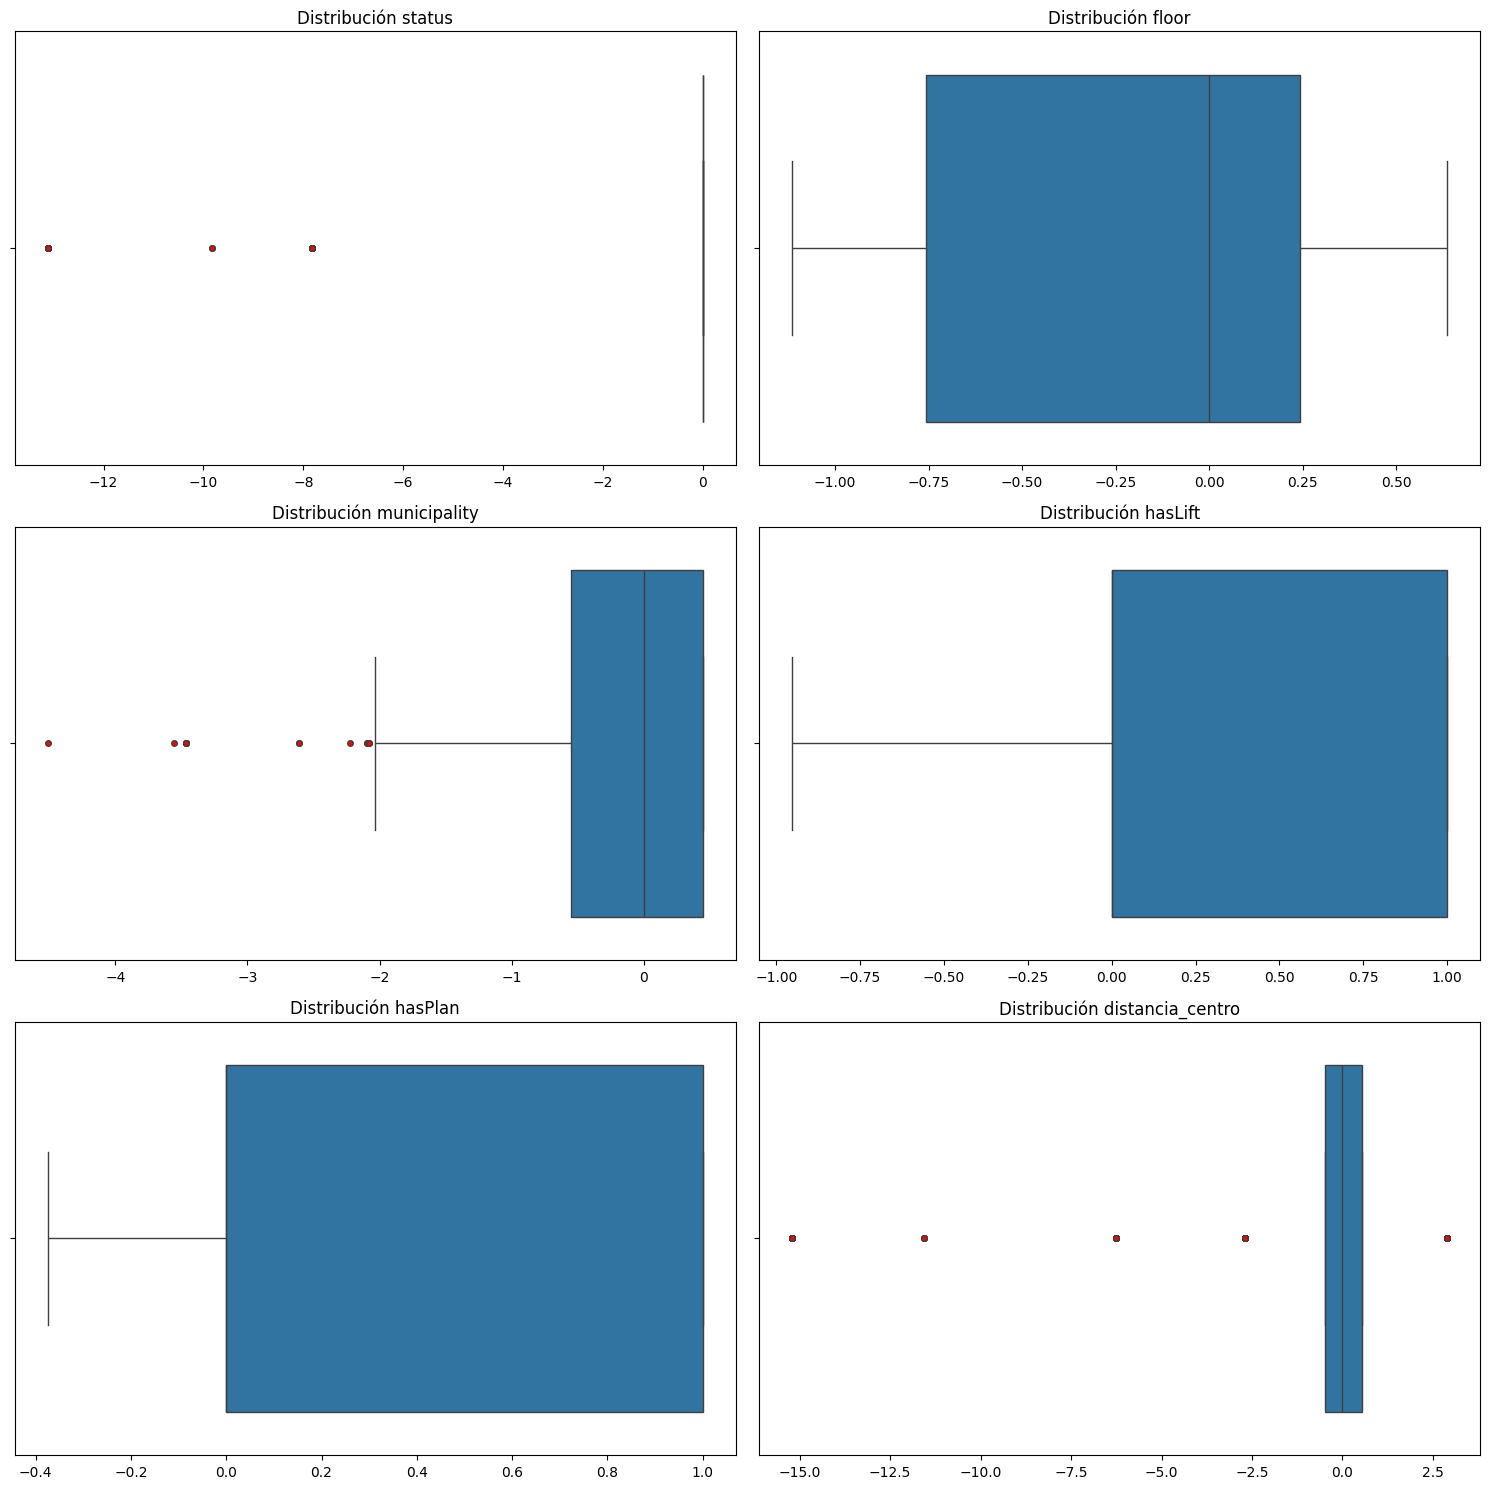

In [44]:
cols_visualizar = ["status","floor","municipality","hasLift","hasPlan","distancia_centro"]
plot_outliers_univariados(df[cols_visualizar],"b",20,(15,15))

# Veamoslo en un histplot

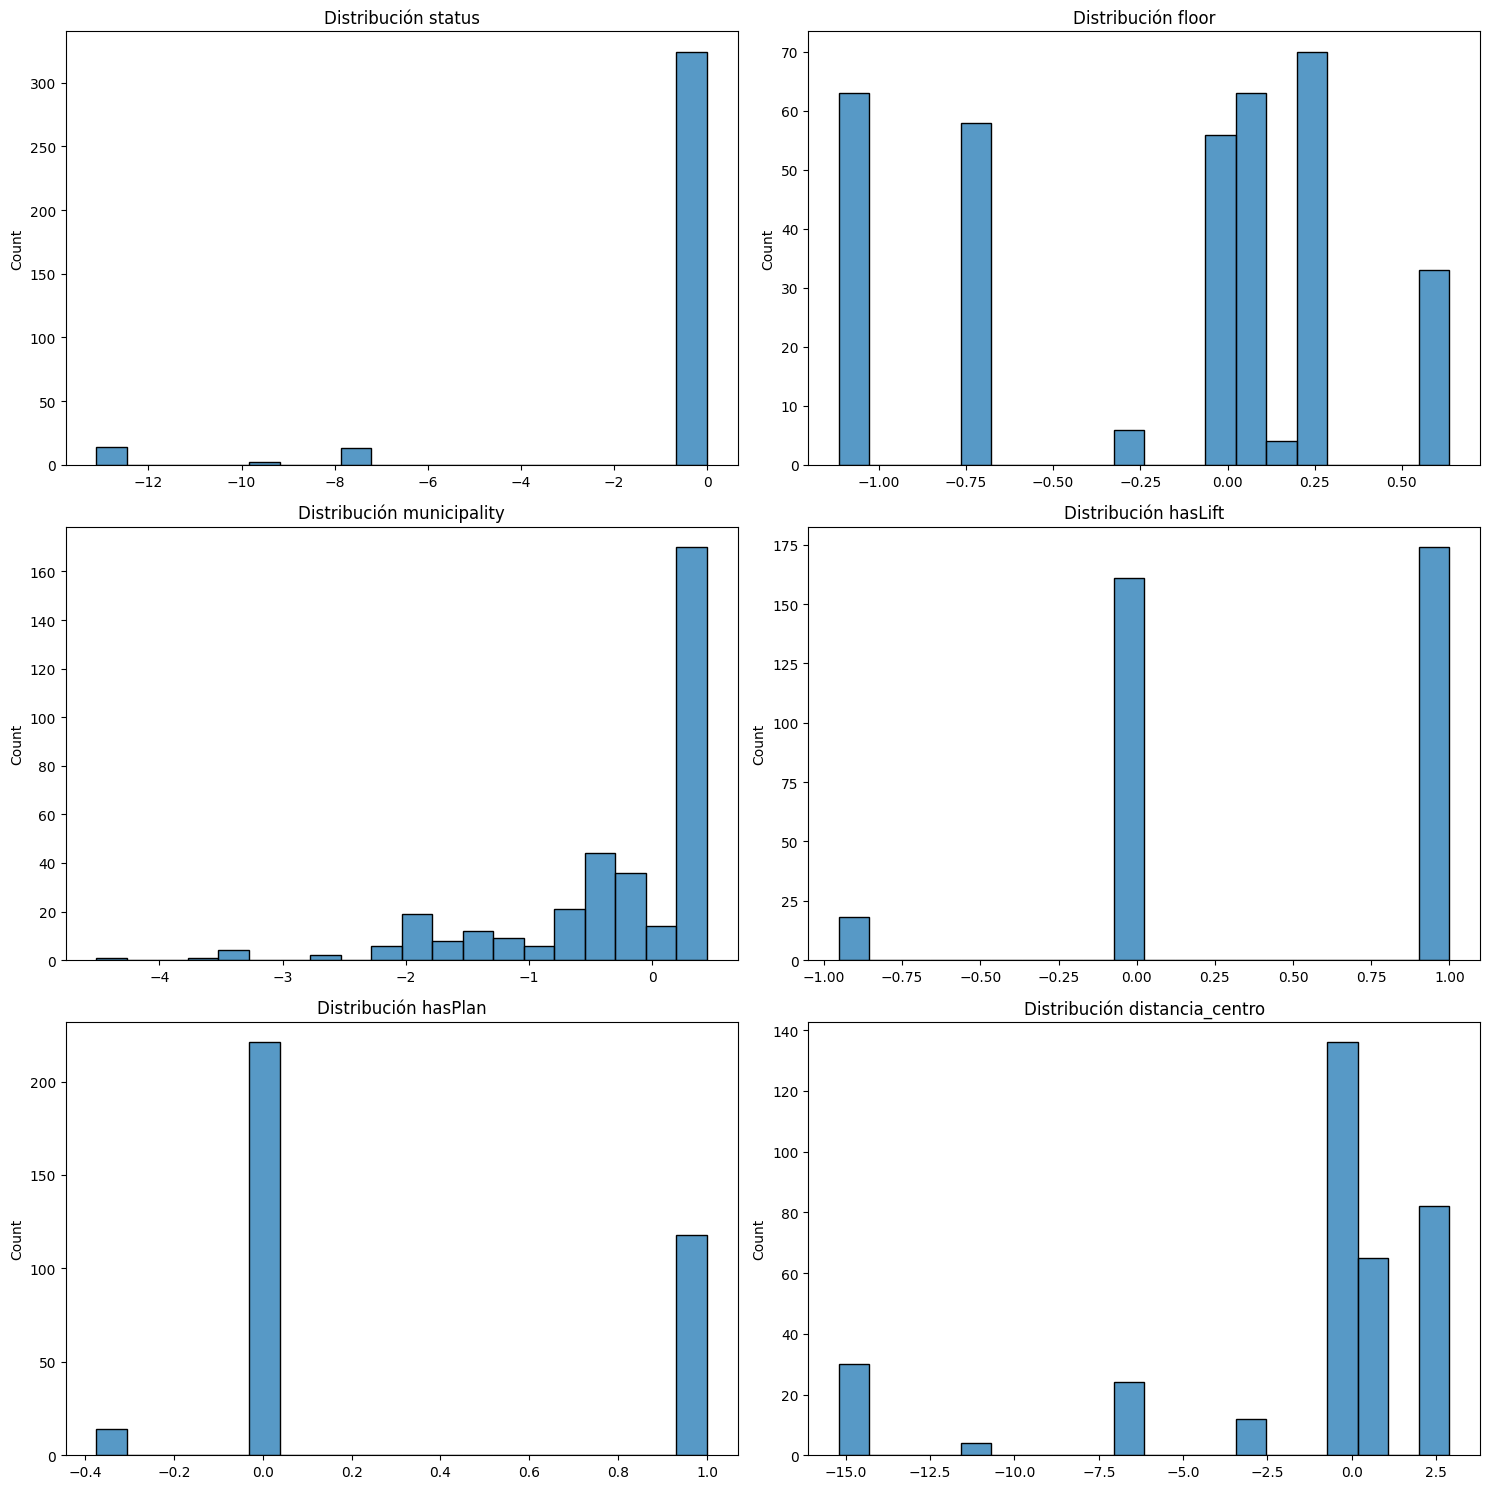

In [45]:
cols_visualizar = ["status","floor","municipality","hasLift","hasPlan","distancia_centro"]
plot_outliers_univariados(df[cols_visualizar],"h",20,(15,15))

# Identificar Outliers Multivariados

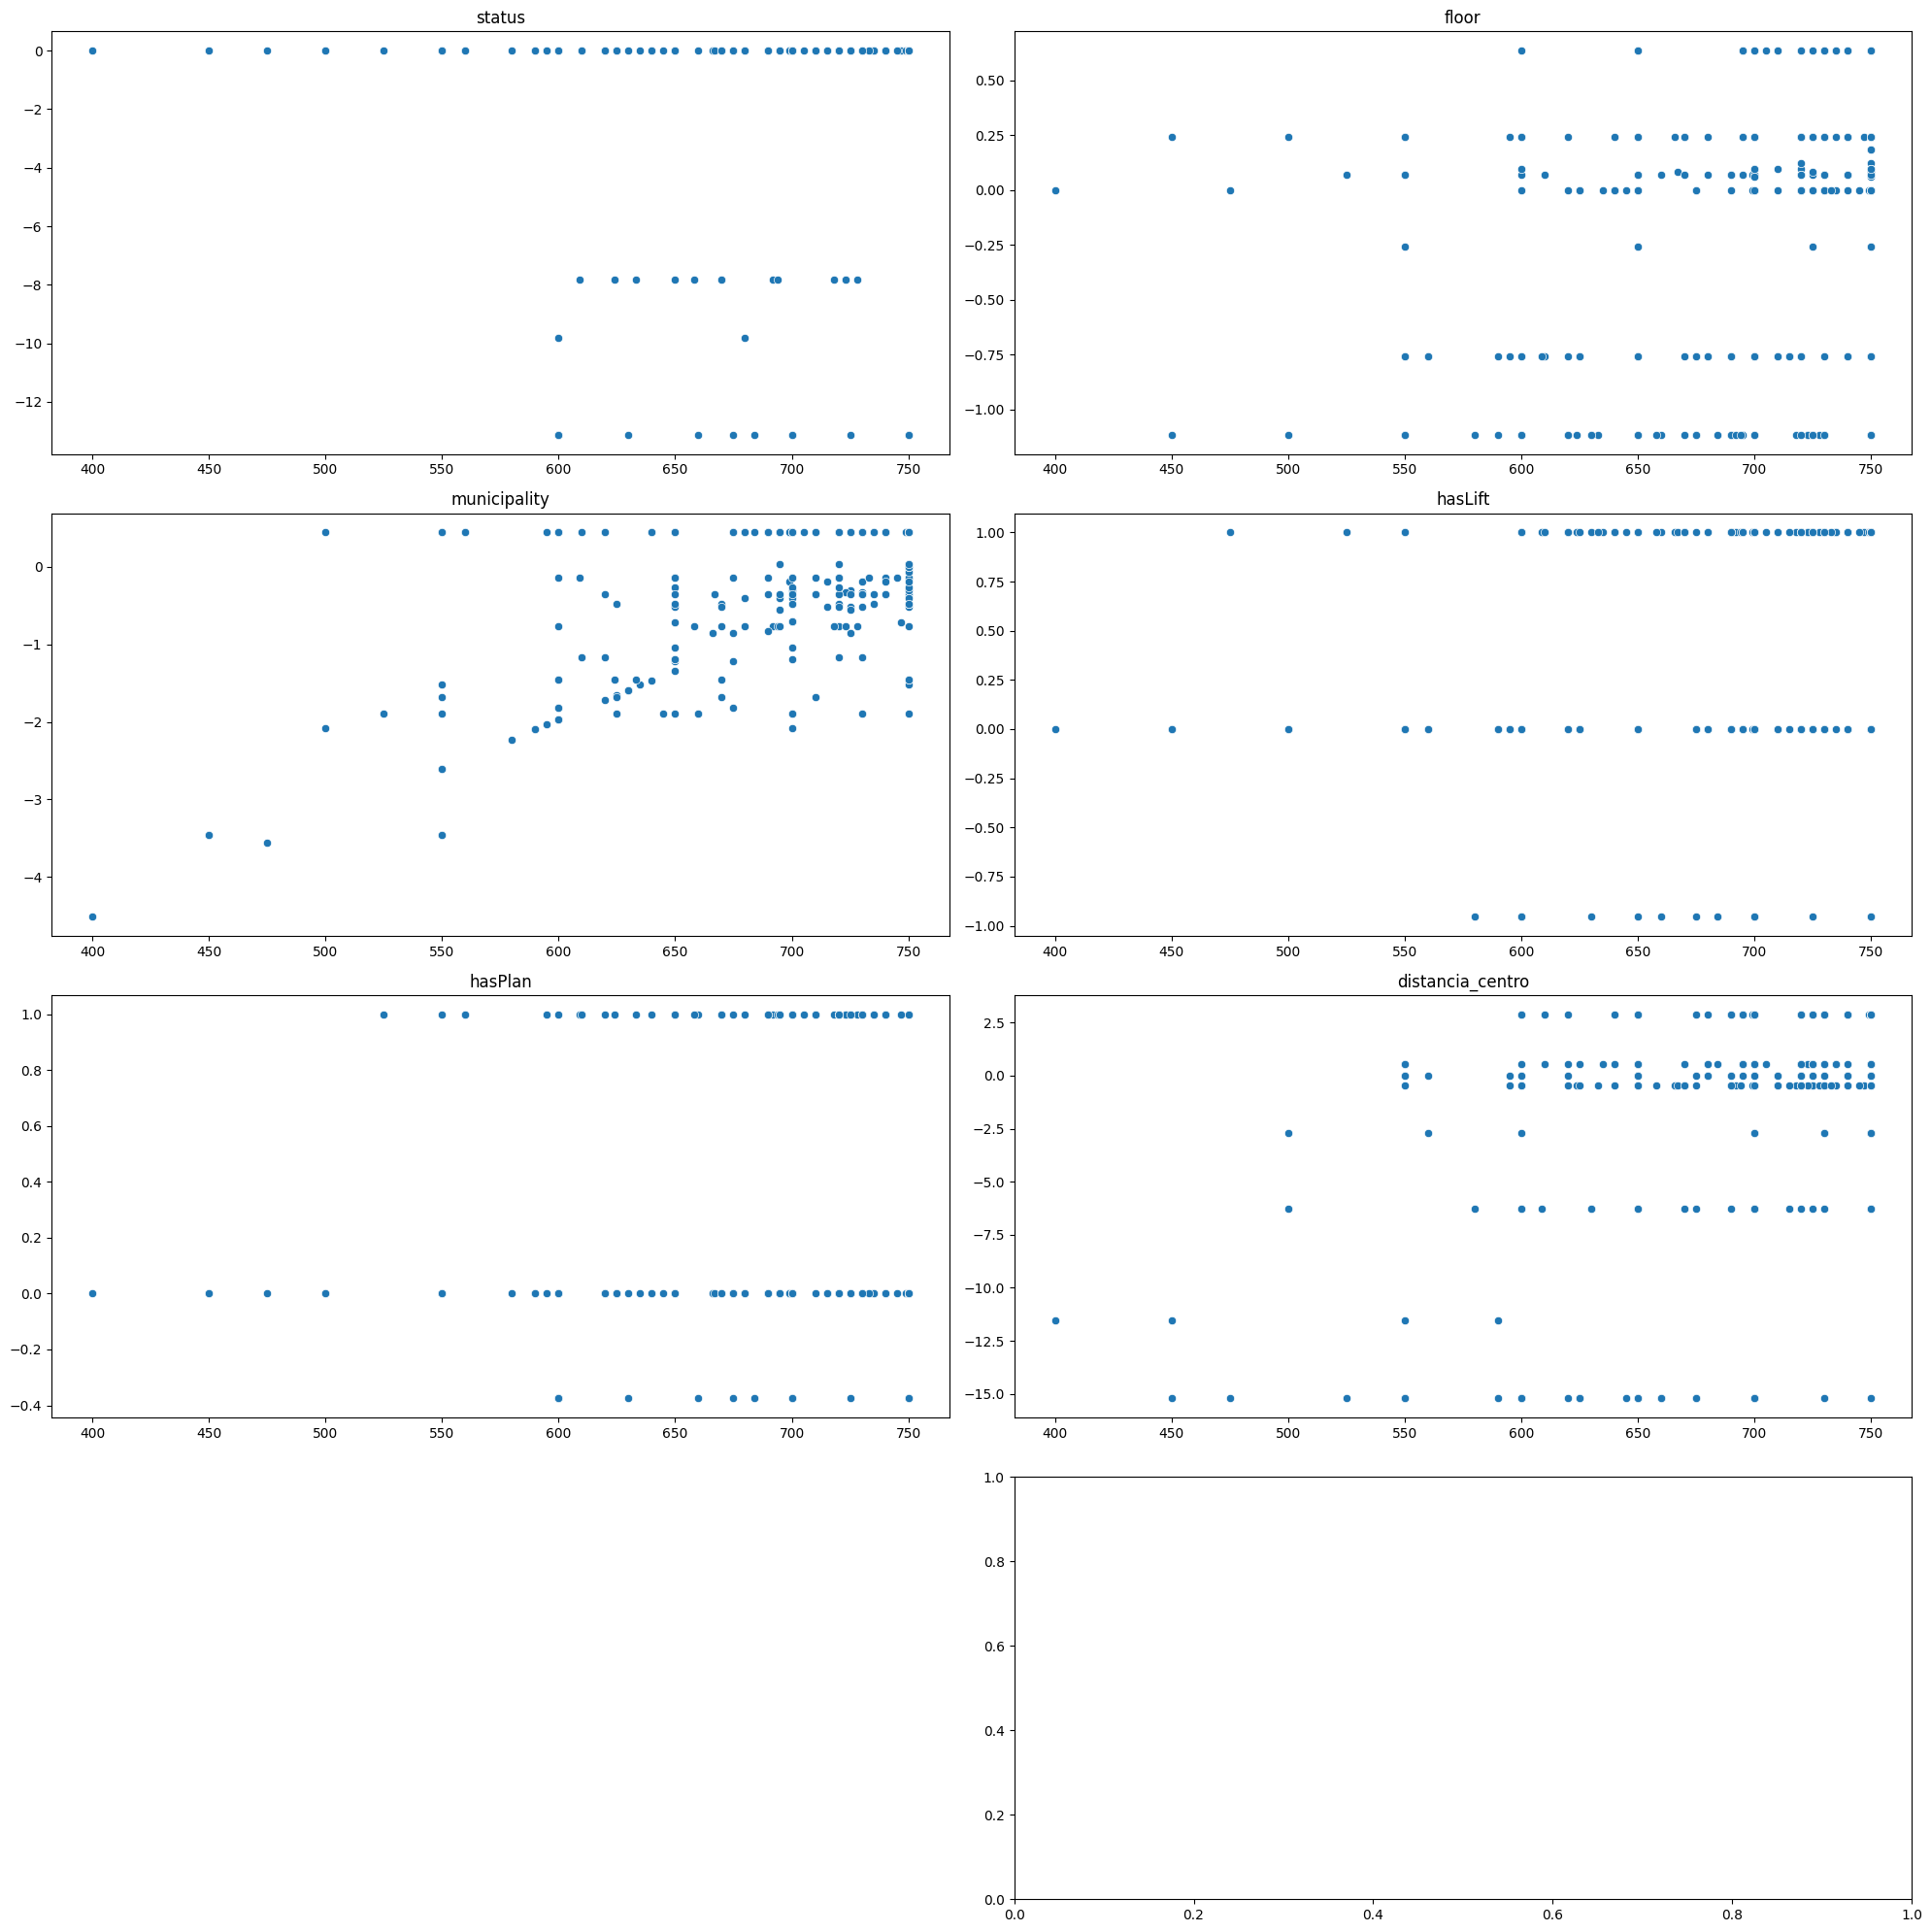

In [46]:
cols_visualizar = ["status","floor","municipality","hasLift","hasPlan","distancia_centro","price"]
visualizar_outliers_bivariados(df[cols_visualizar],"price",(20,20))

# Analicemos con IQR si hay outliers
- Solo revisamos las no binarias

In [47]:
cols_visualizar = ["status","floor","municipality","hasLift","hasPlan","distancia_centro","price"]
dictio_iqr = identificar_outliers_iqr(df[cols_visualizar])

La columna STATUS tiene 29 outliers entre el total de 353 datos, es decir un 8.21529745042493%
La columna FLOOR tiene 0 outliers entre el total de 353 datos, es decir un 0.0%
La columna MUNICIPALITY tiene 13 outliers entre el total de 353 datos, es decir un 3.6827195467422094%
La columna HASLIFT tiene 0 outliers entre el total de 353 datos, es decir un 0.0%
La columna HASPLAN tiene 0 outliers entre el total de 353 datos, es decir un 0.0%
La columna DISTANCIA_CENTRO tiene 152 outliers entre el total de 353 datos, es decir un 43.05949008498583%
La columna PRICE tiene 6 outliers entre el total de 353 datos, es decir un 1.69971671388102%


# Realizamos un LOF para detectar outliers

se ha hecho outlier_0.01_status_lof
se ha hecho outlier_0.01_floor_lof
se ha hecho outlier_0.01_municipality_lof
se ha hecho outlier_0.01_hasLift_lof
se ha hecho outlier_0.01_hasPlan_lof
se ha hecho outlier_0.01_distancia_centro_lof


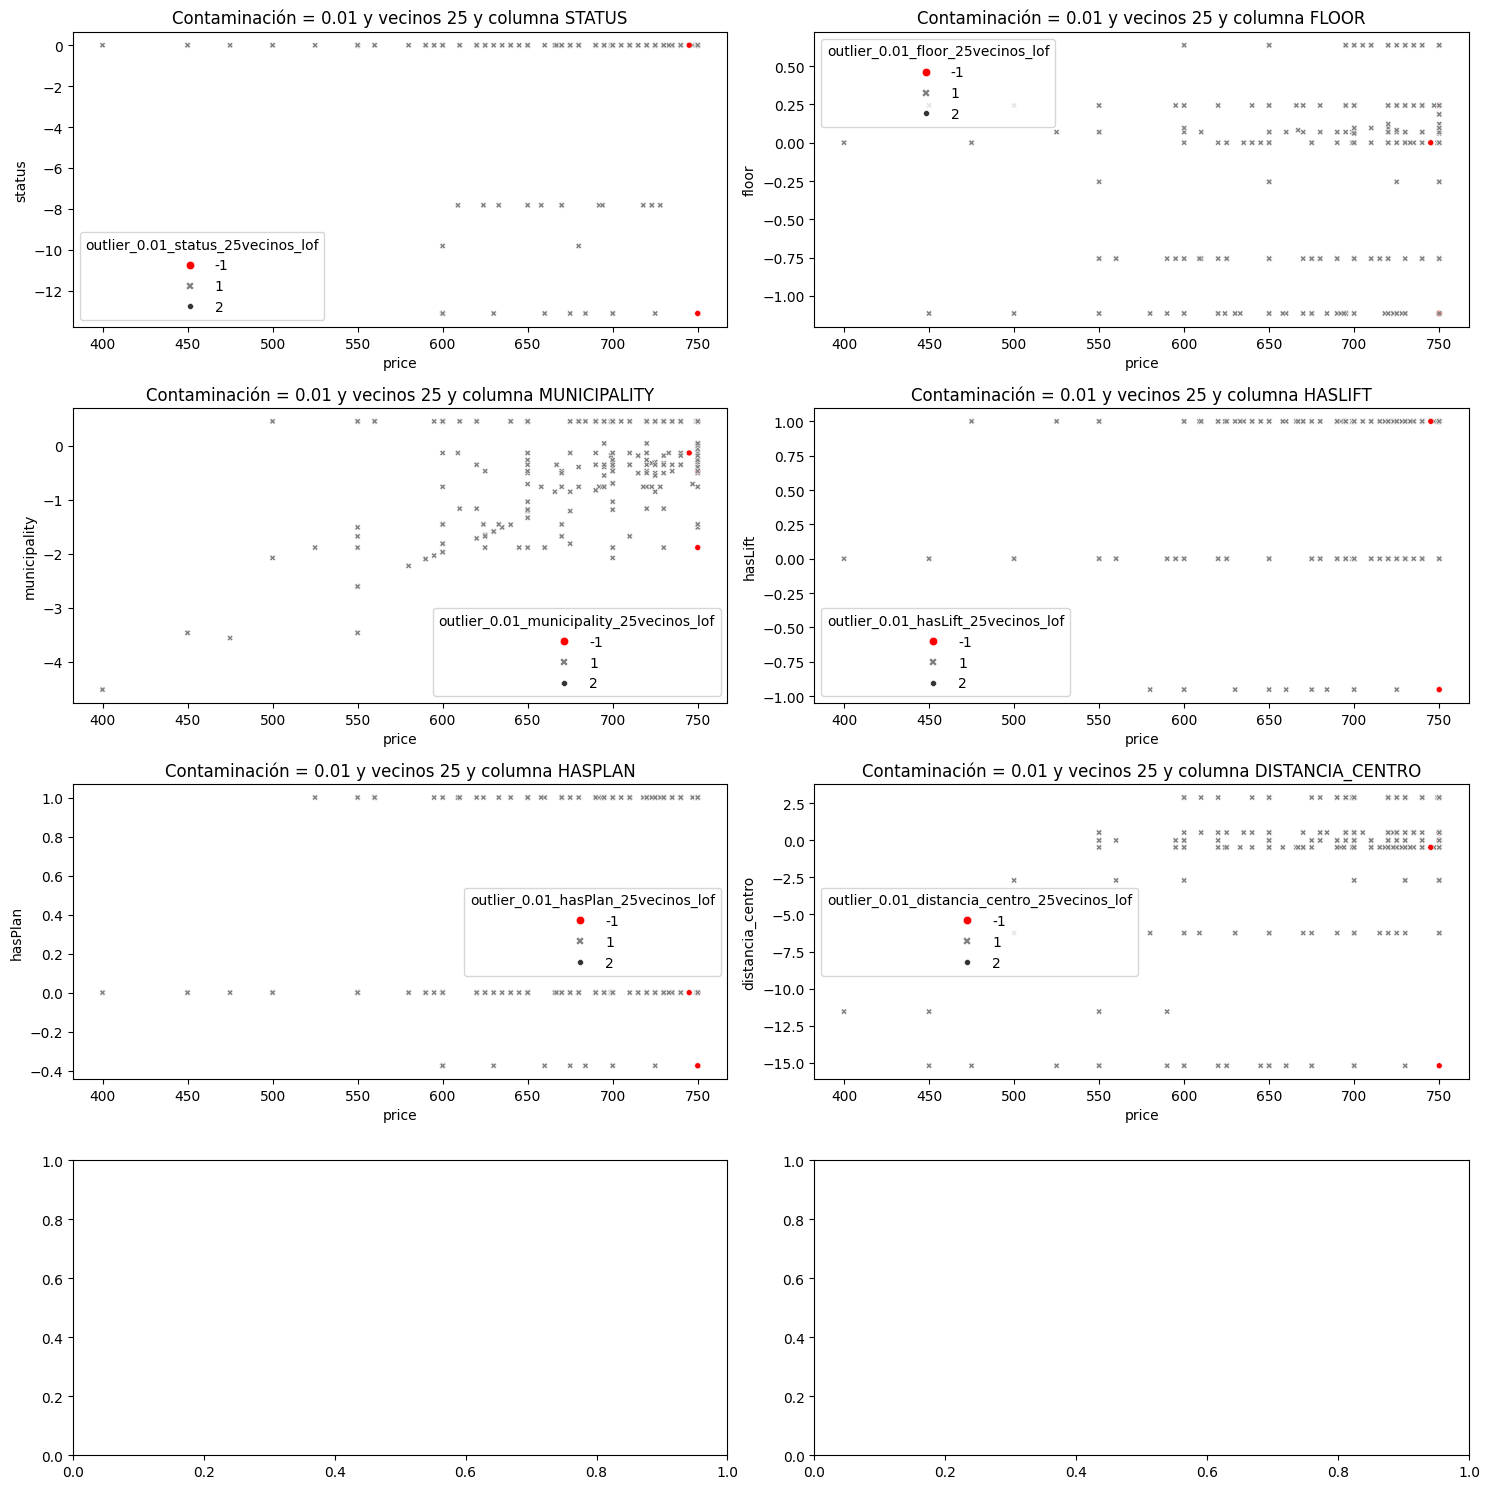

se ha hecho outlier_0.05_status_lof
se ha hecho outlier_0.05_floor_lof
se ha hecho outlier_0.05_municipality_lof
se ha hecho outlier_0.05_hasLift_lof
se ha hecho outlier_0.05_hasPlan_lof
se ha hecho outlier_0.05_distancia_centro_lof


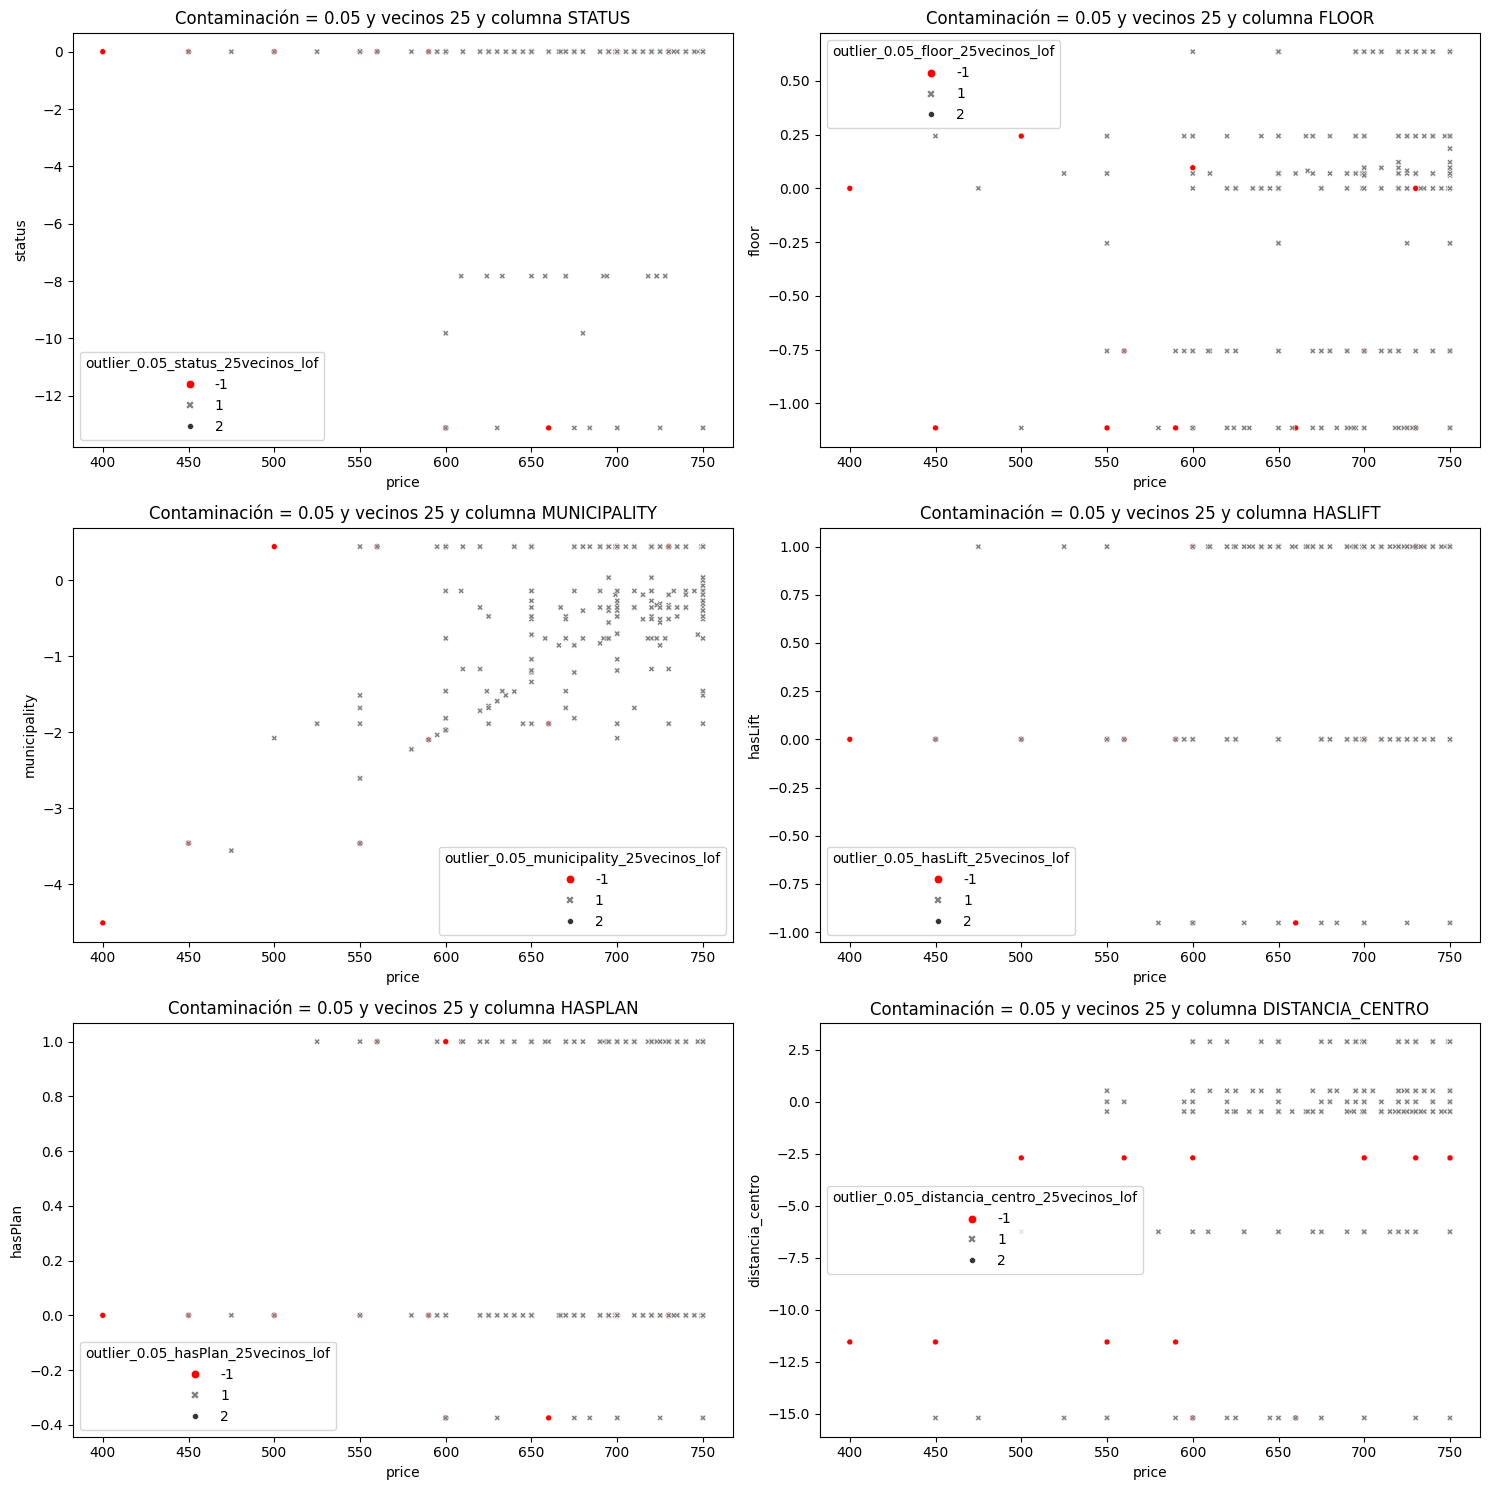

se ha hecho outlier_0.1_status_lof
se ha hecho outlier_0.1_floor_lof
se ha hecho outlier_0.1_municipality_lof
se ha hecho outlier_0.1_hasLift_lof
se ha hecho outlier_0.1_hasPlan_lof
se ha hecho outlier_0.1_distancia_centro_lof


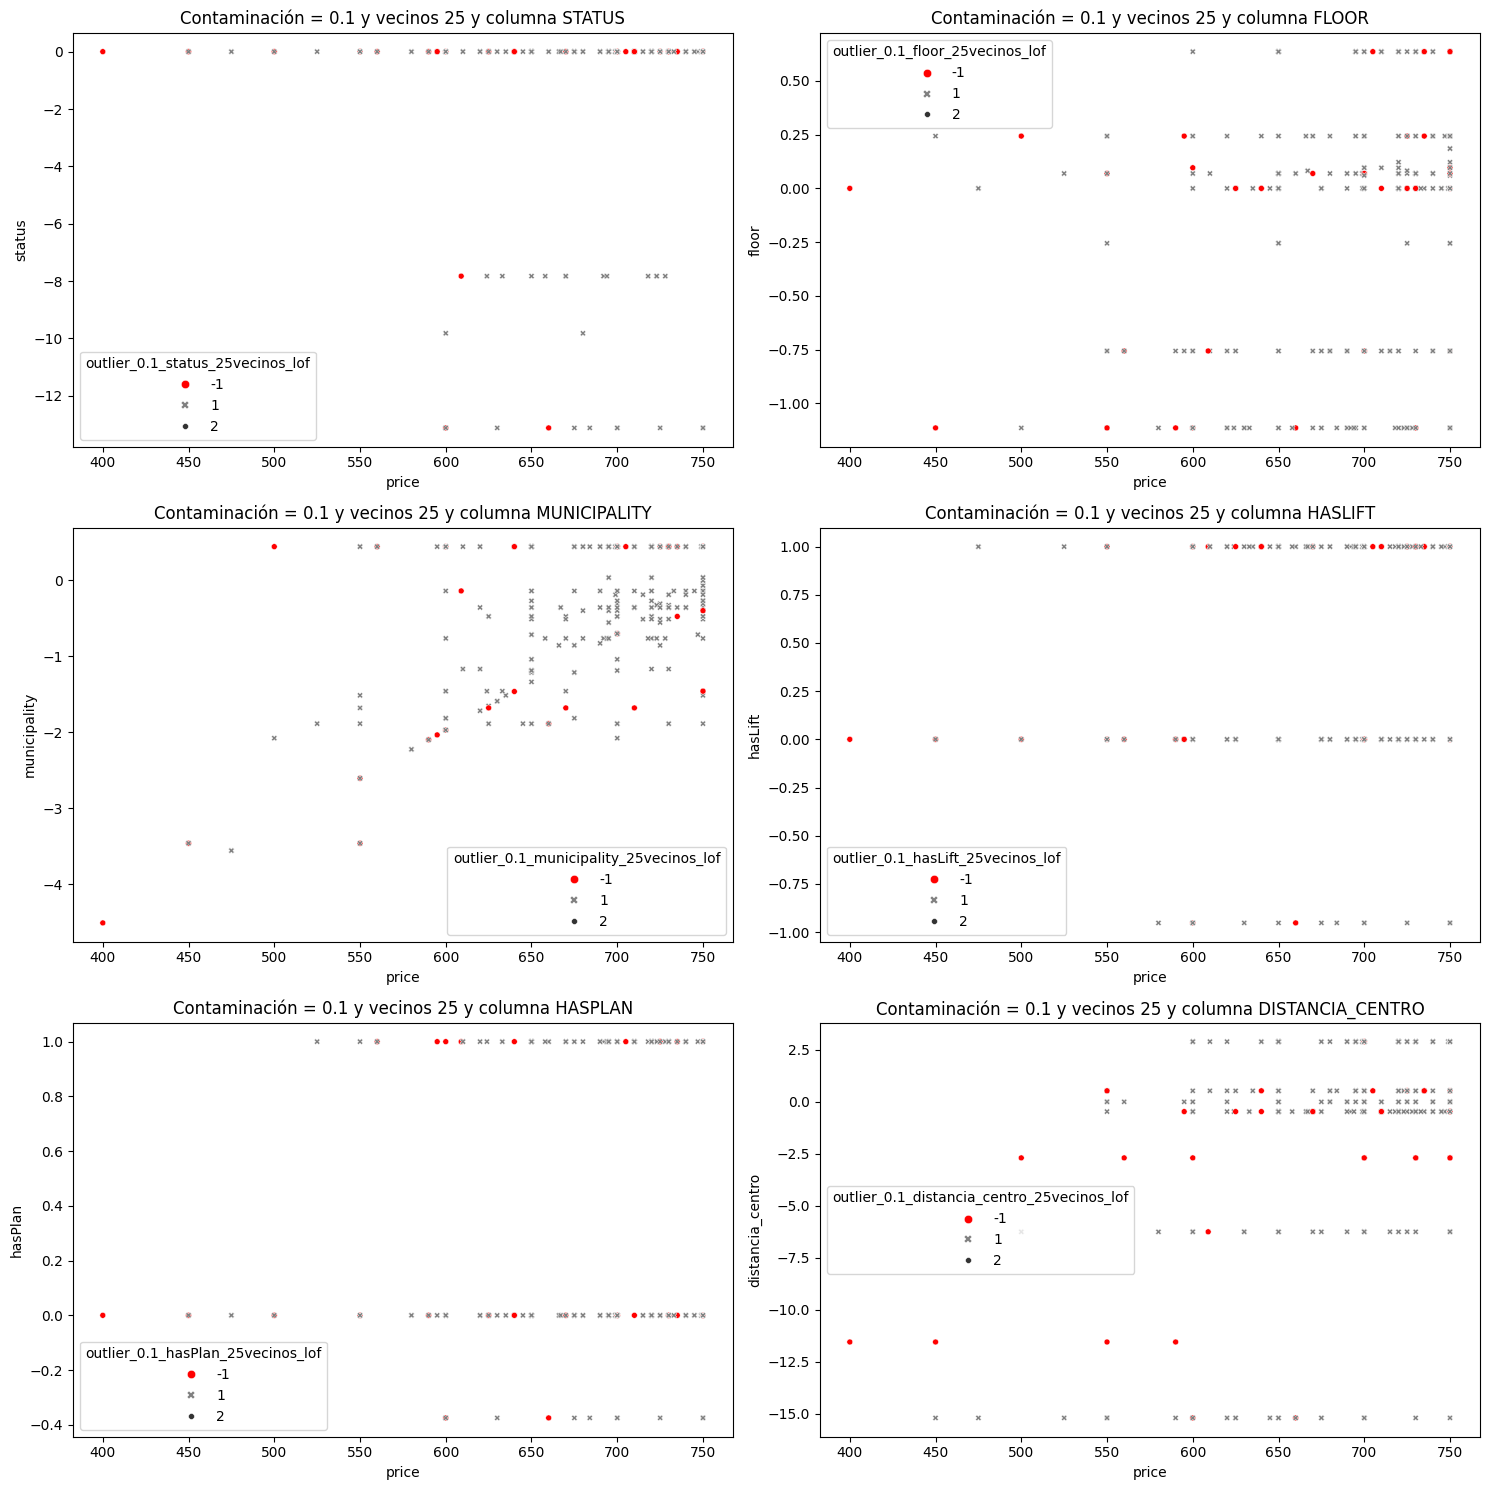

se ha hecho outlier_0.01_status_lof
se ha hecho outlier_0.01_floor_lof
se ha hecho outlier_0.01_municipality_lof
se ha hecho outlier_0.01_hasLift_lof
se ha hecho outlier_0.01_hasPlan_lof
se ha hecho outlier_0.01_distancia_centro_lof


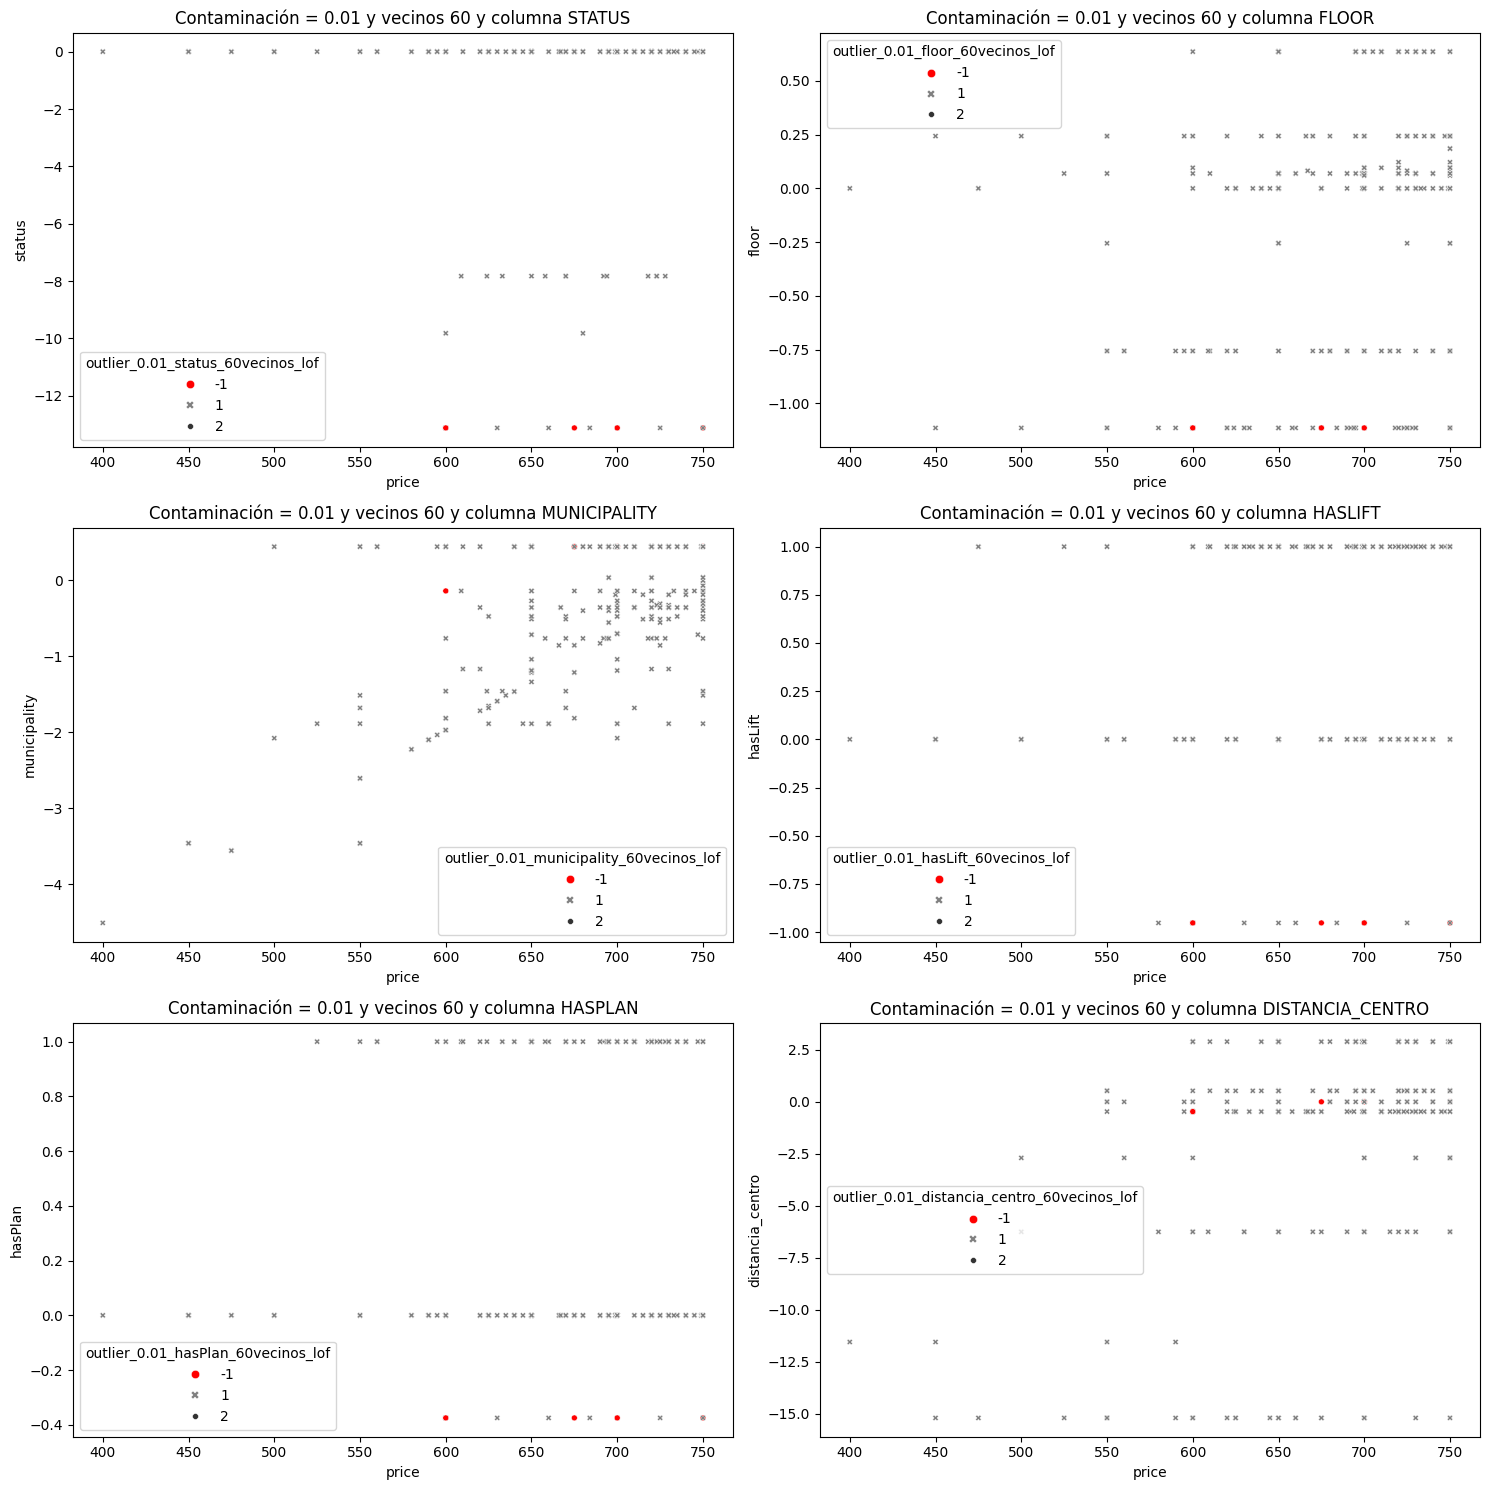

se ha hecho outlier_0.05_status_lof
se ha hecho outlier_0.05_floor_lof
se ha hecho outlier_0.05_municipality_lof
se ha hecho outlier_0.05_hasLift_lof
se ha hecho outlier_0.05_hasPlan_lof
se ha hecho outlier_0.05_distancia_centro_lof


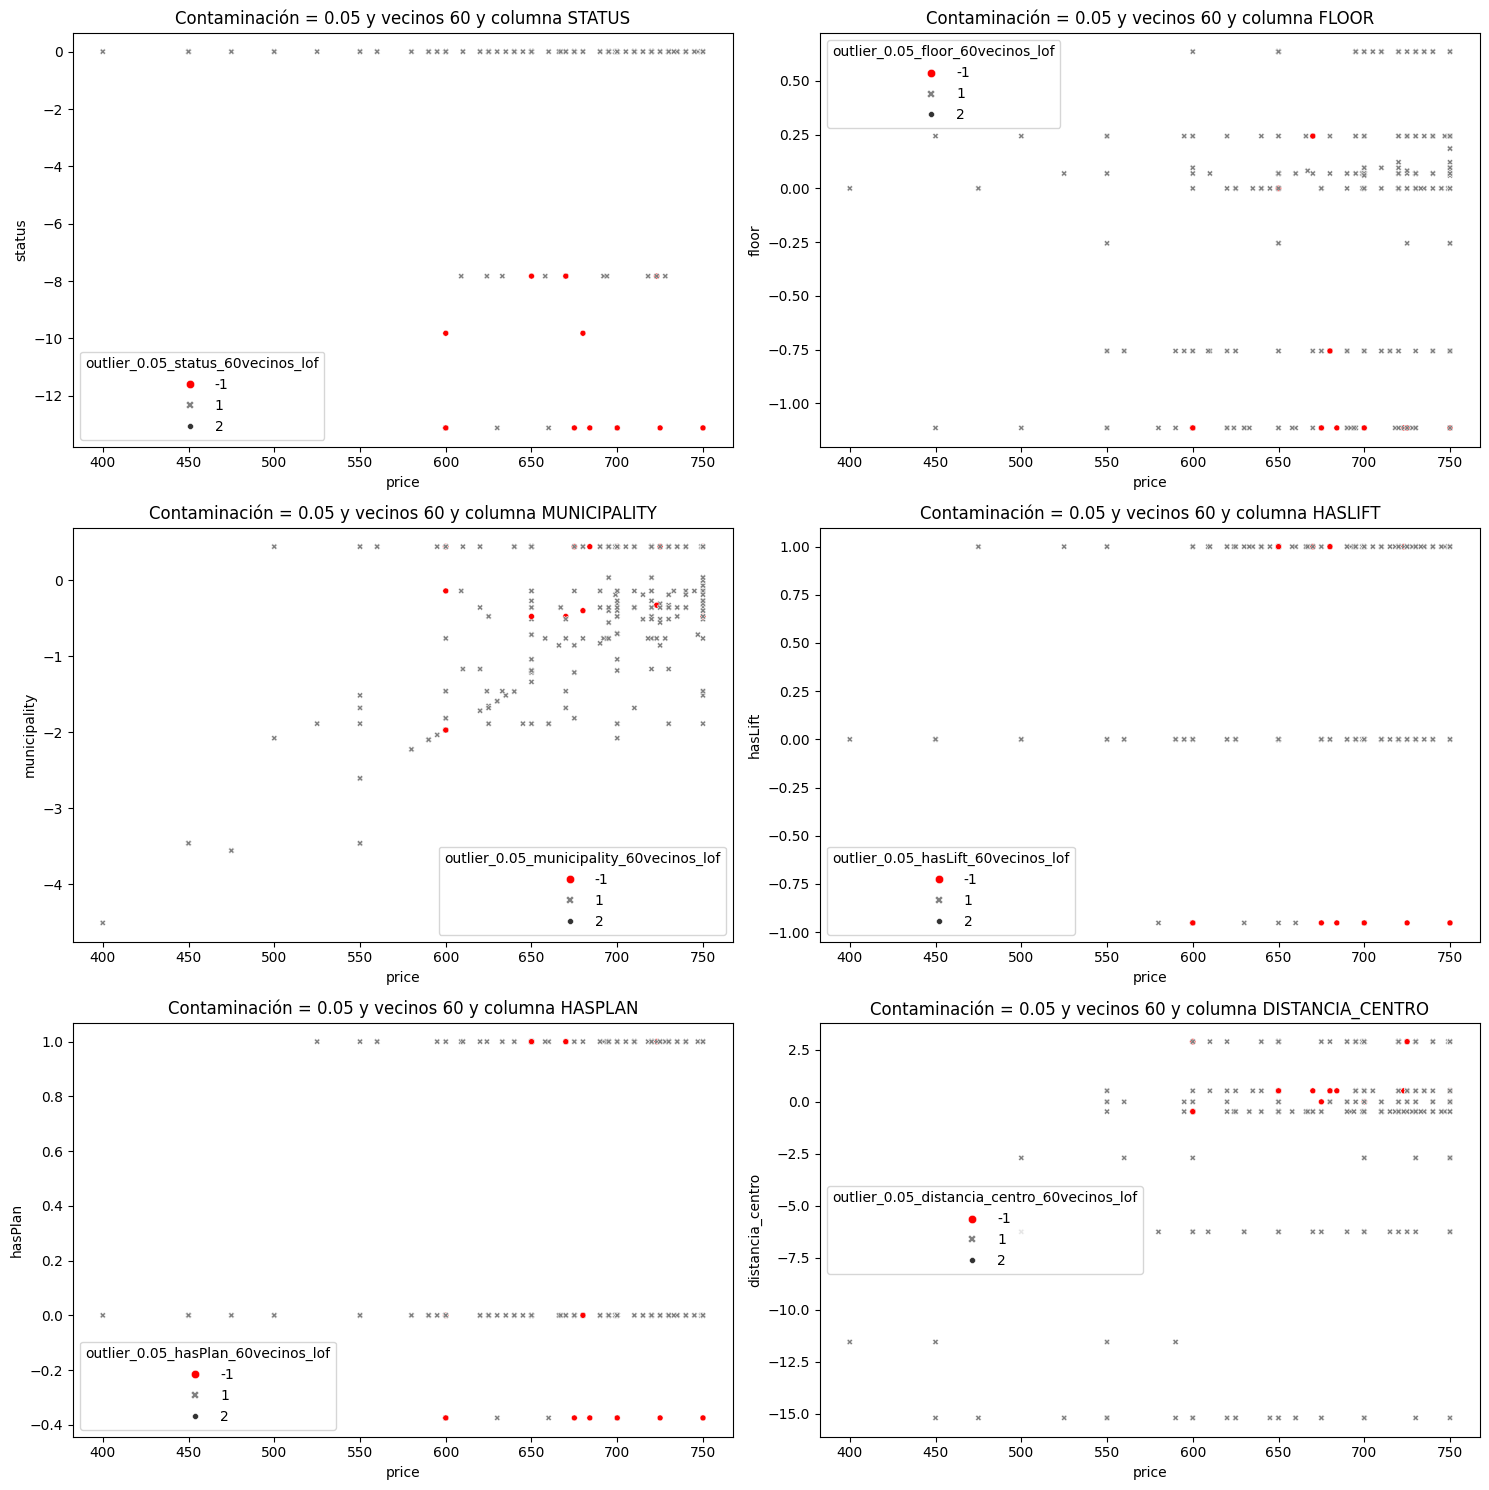

se ha hecho outlier_0.1_status_lof
se ha hecho outlier_0.1_floor_lof
se ha hecho outlier_0.1_municipality_lof
se ha hecho outlier_0.1_hasLift_lof
se ha hecho outlier_0.1_hasPlan_lof
se ha hecho outlier_0.1_distancia_centro_lof


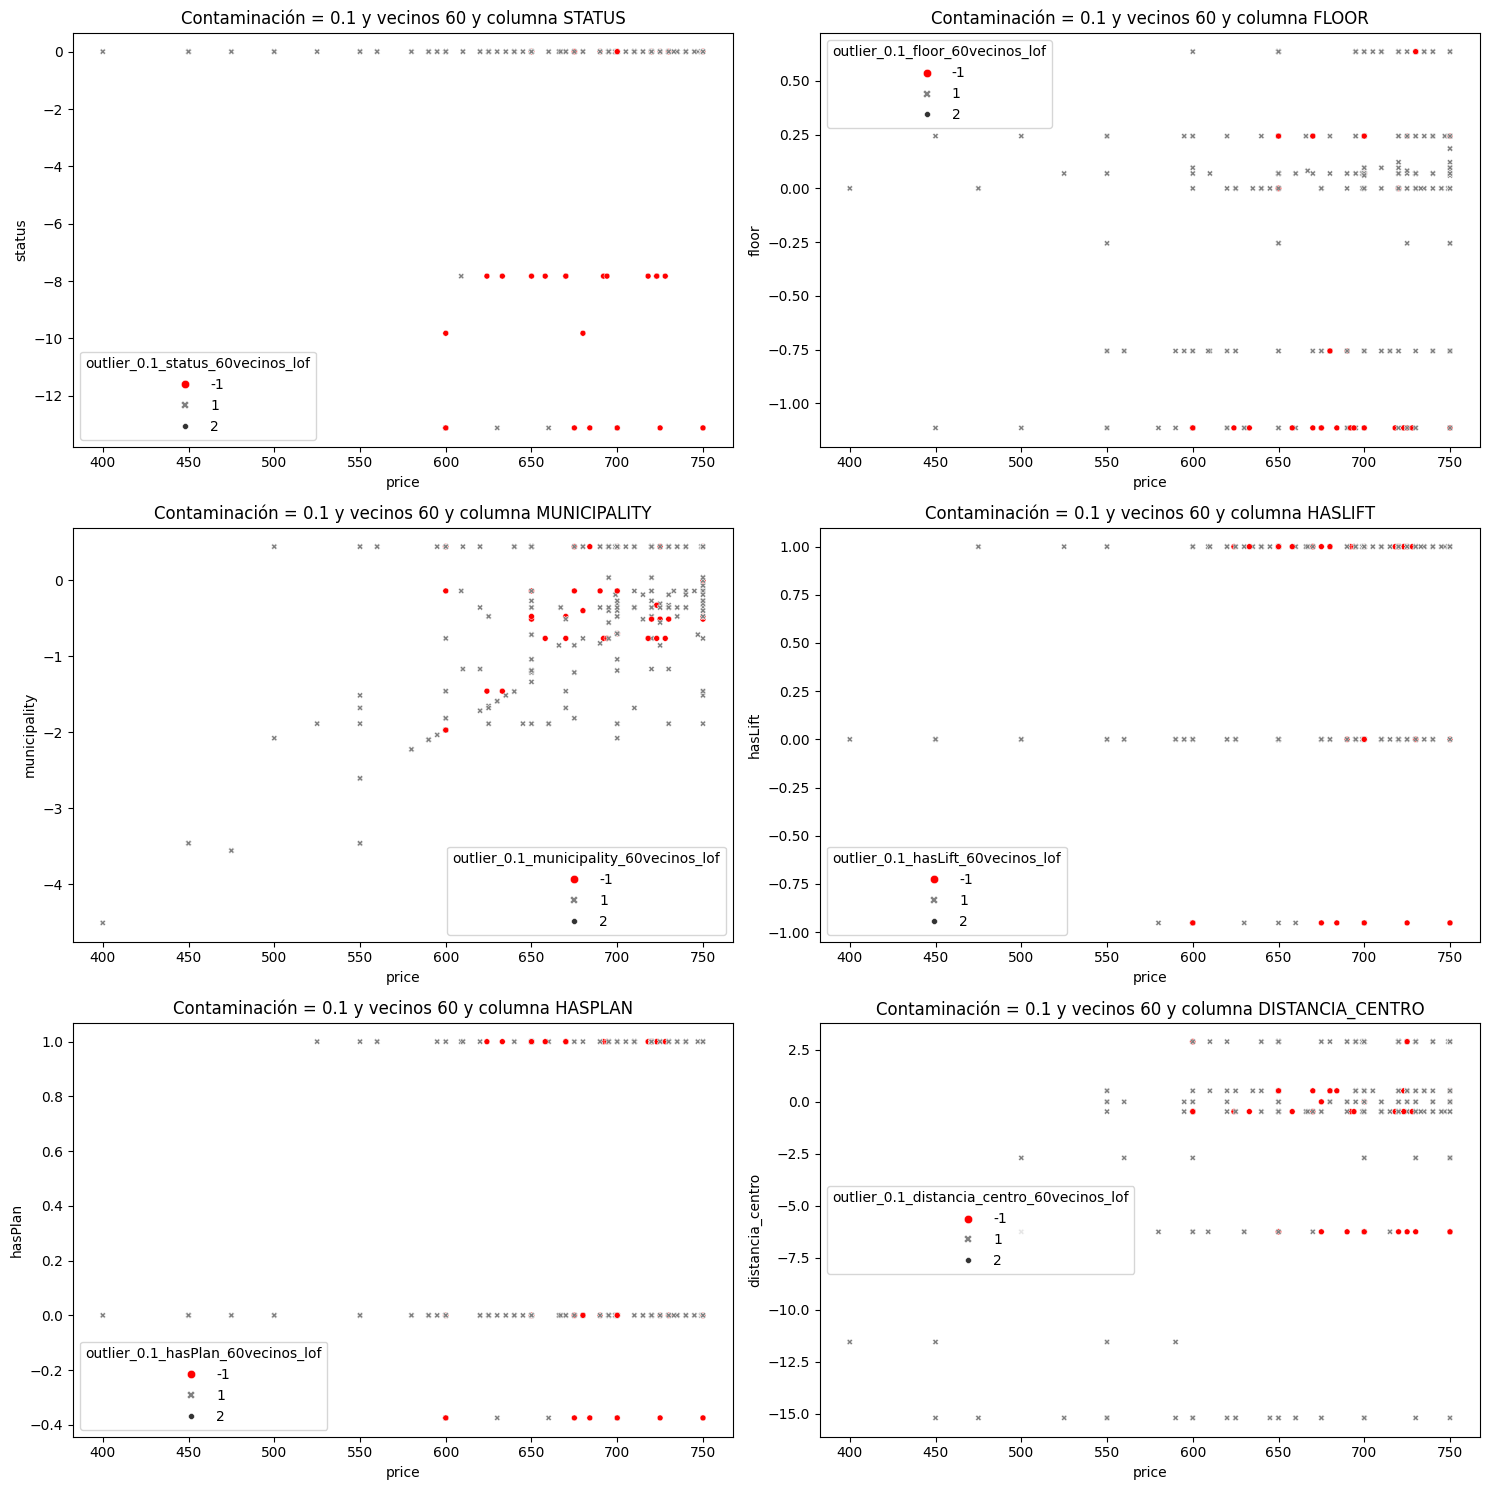

se ha hecho outlier_0.01_status_lof
se ha hecho outlier_0.01_floor_lof
se ha hecho outlier_0.01_municipality_lof
se ha hecho outlier_0.01_hasLift_lof
se ha hecho outlier_0.01_hasPlan_lof
se ha hecho outlier_0.01_distancia_centro_lof


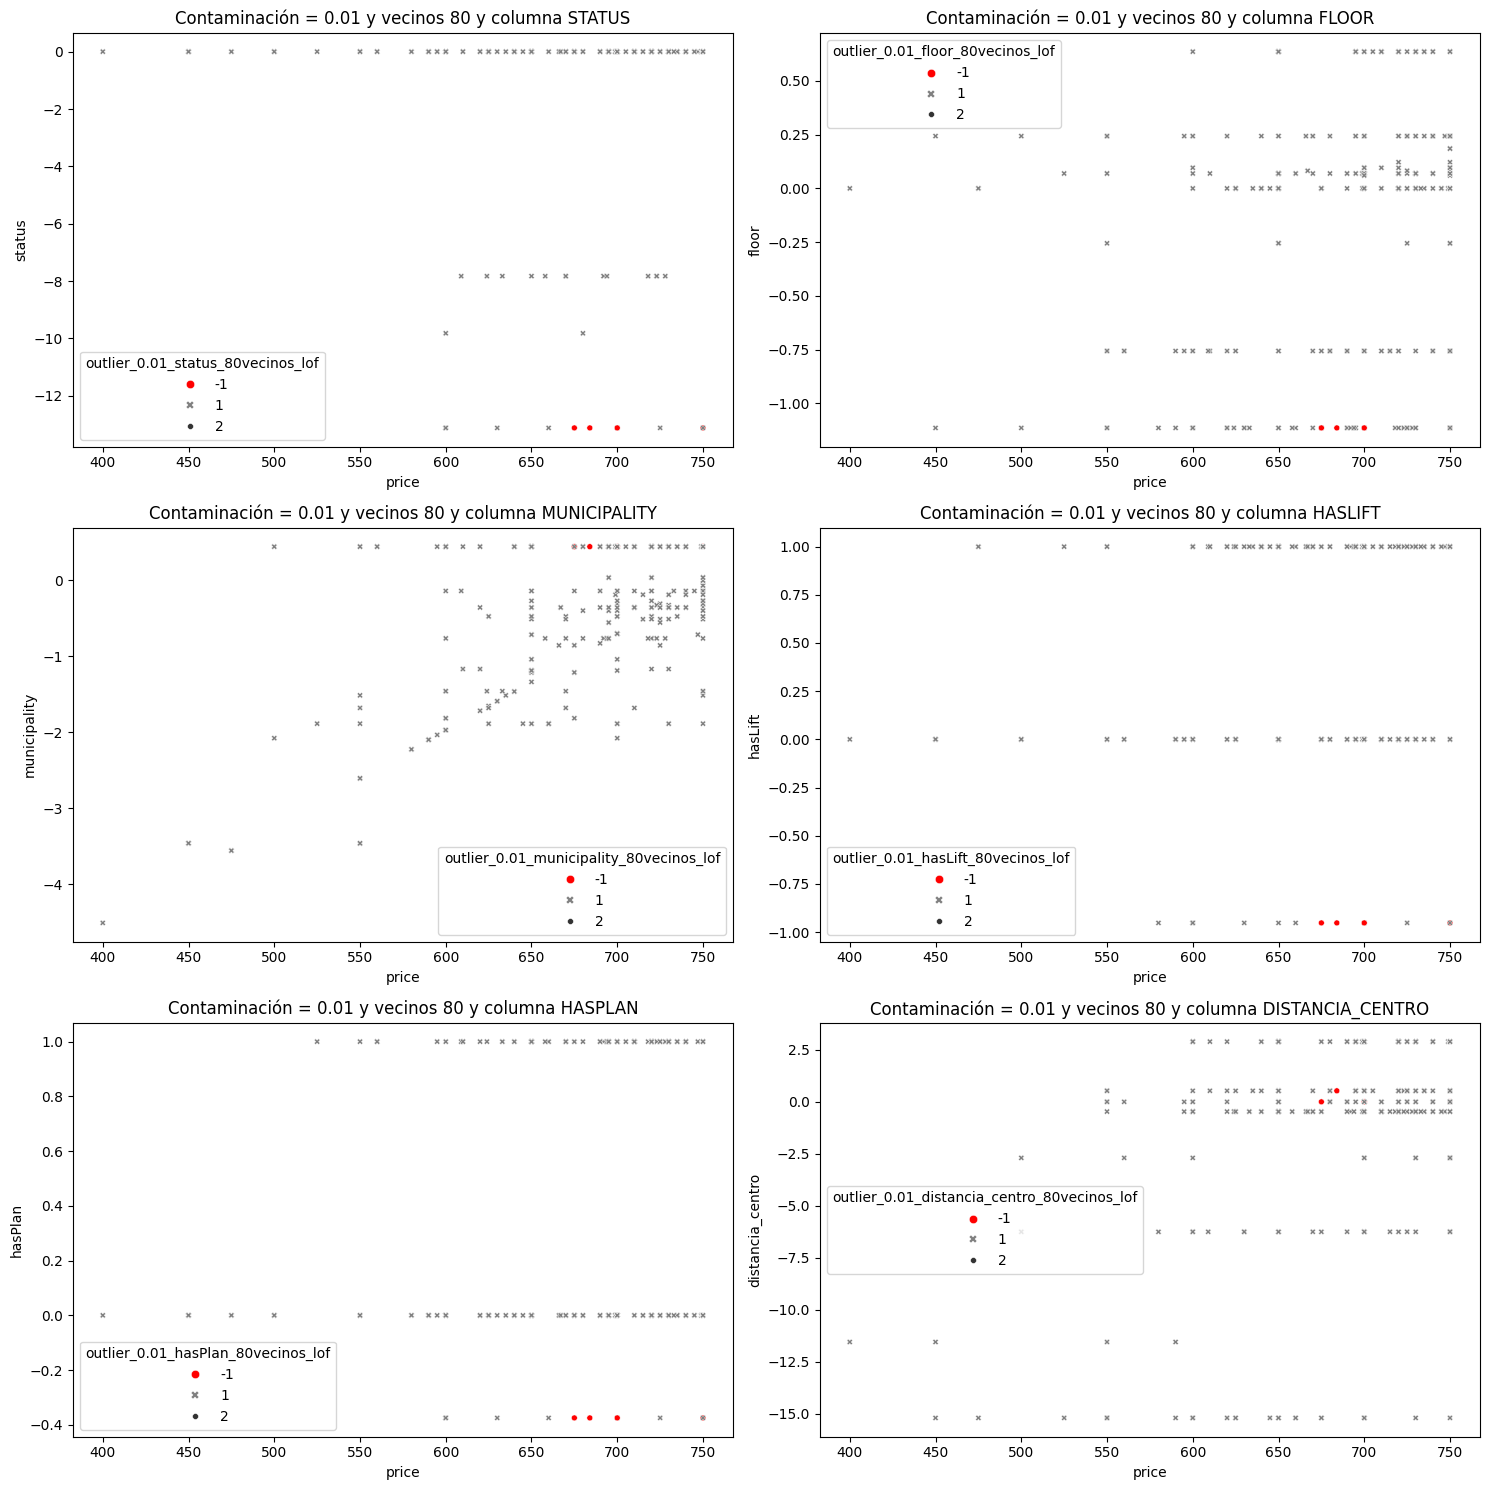

se ha hecho outlier_0.05_status_lof
se ha hecho outlier_0.05_floor_lof
se ha hecho outlier_0.05_municipality_lof
se ha hecho outlier_0.05_hasLift_lof
se ha hecho outlier_0.05_hasPlan_lof
se ha hecho outlier_0.05_distancia_centro_lof


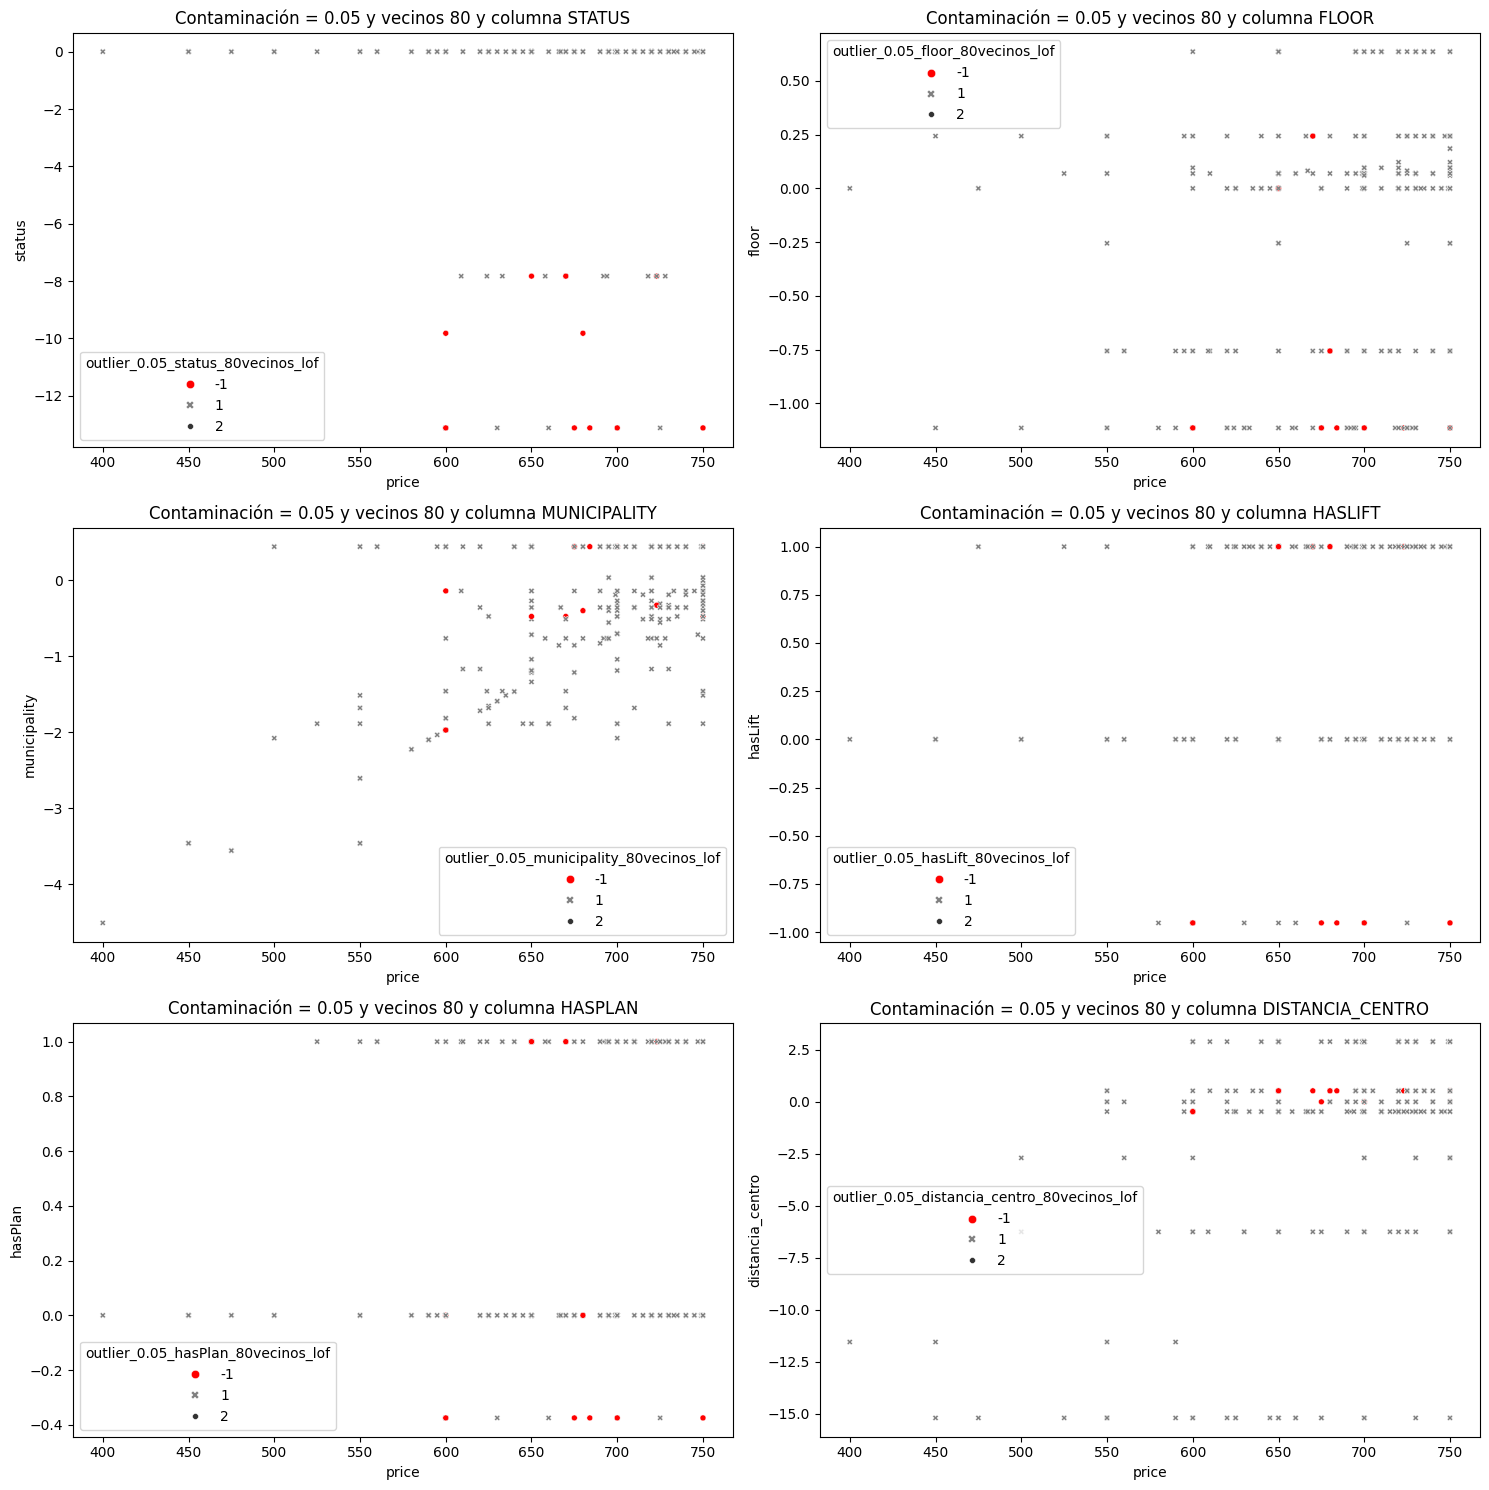

se ha hecho outlier_0.1_status_lof
se ha hecho outlier_0.1_floor_lof
se ha hecho outlier_0.1_municipality_lof
se ha hecho outlier_0.1_hasLift_lof
se ha hecho outlier_0.1_hasPlan_lof
se ha hecho outlier_0.1_distancia_centro_lof


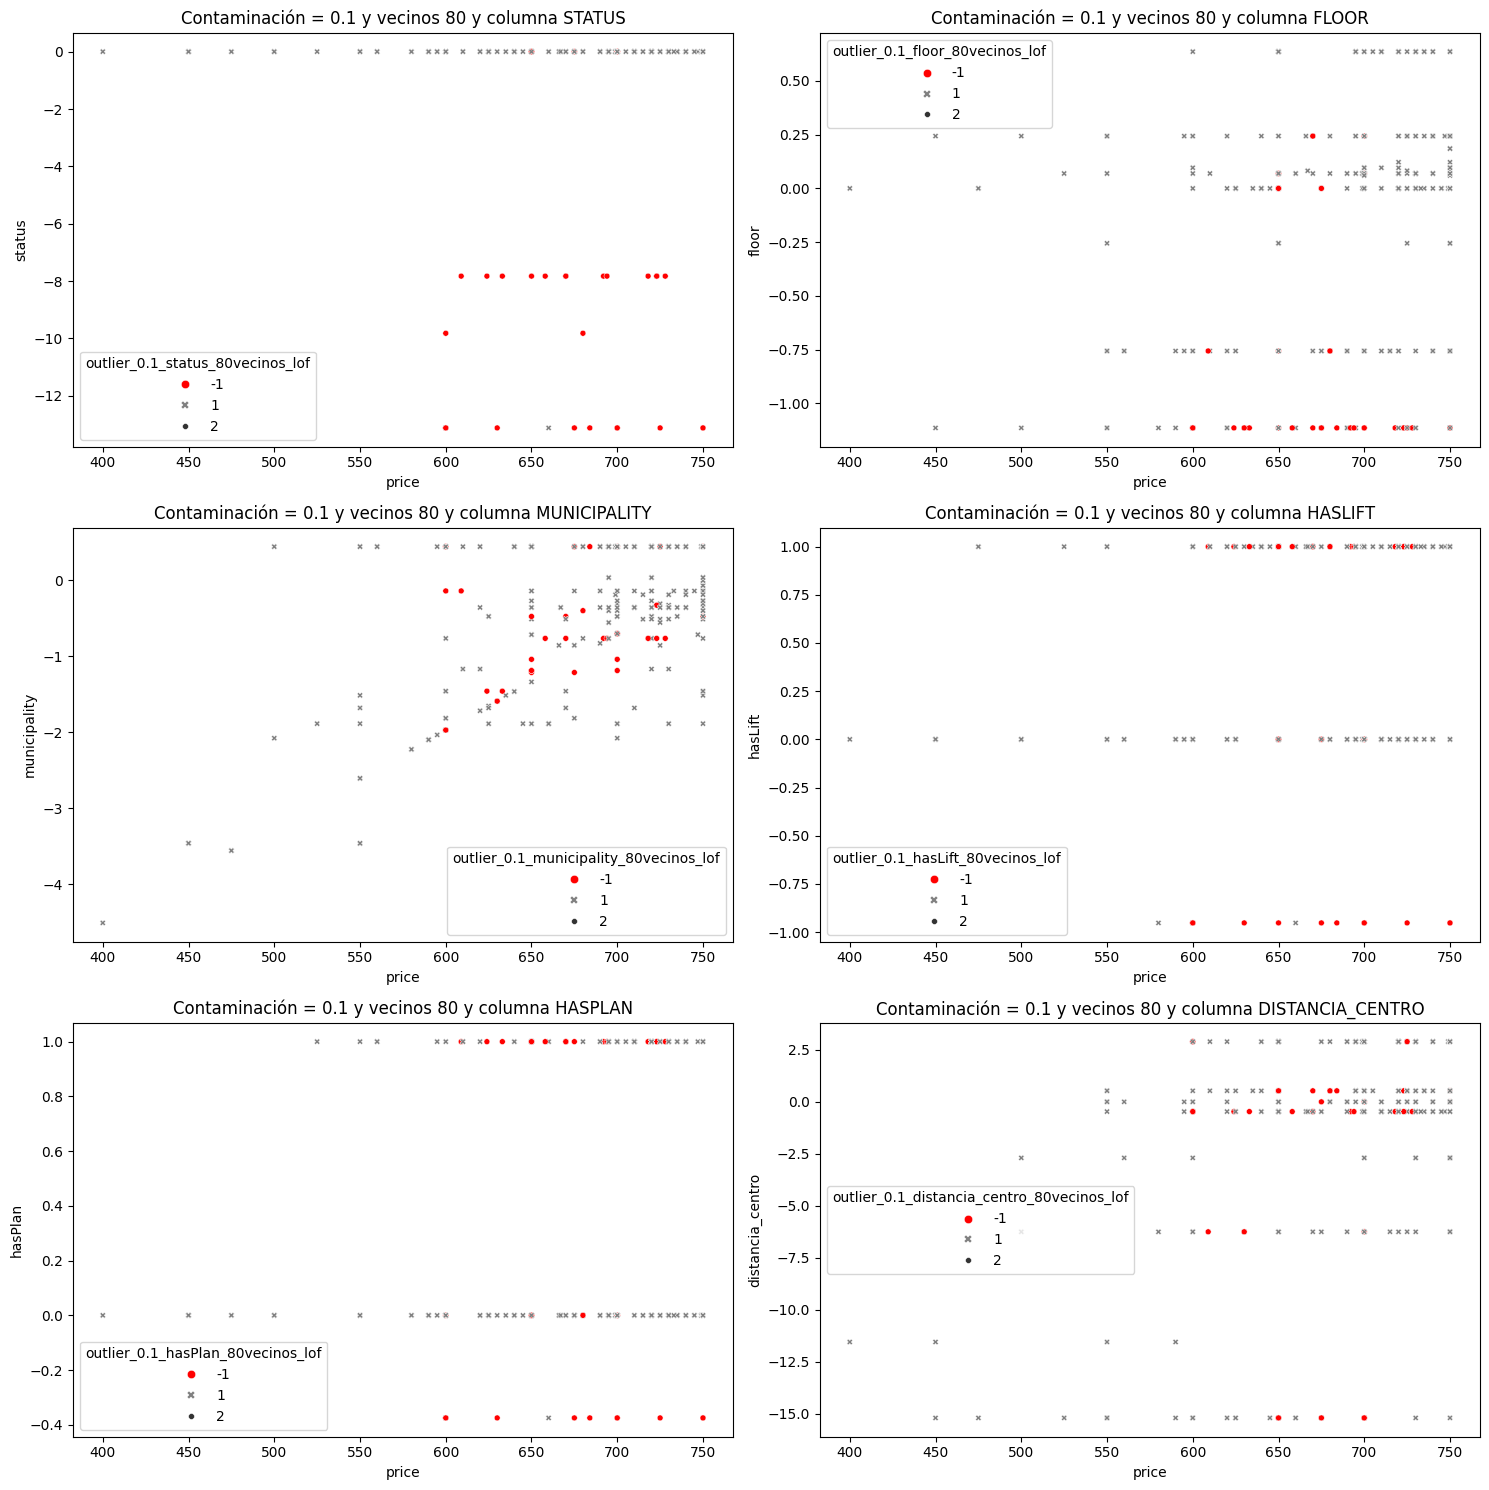

Se devuelve df Modificado


In [48]:
cols_analizar = ["status","floor","municipality","hasLift","hasPlan","distancia_centro","price"]
df_lof = explorar_outliers_lof(df[cols_visualizar],df,"price",vecinos=[25,60,80],grafica_size=(15,15))

In [49]:
df_lof.sample()

,status,floor,municipality,hasLift,hasPlan,distancia_centro,price,size,propertyType_chalet,propertyType_countryHouse,...,outlier_0.05_municipality_80vecinos_lof,outlier_0.05_hasLift_80vecinos_lof,outlier_0.05_hasPlan_80vecinos_lof,outlier_0.05_distancia_centro_80vecinos_lof,outlier_0.1_status_80vecinos_lof,outlier_0.1_floor_80vecinos_lof,outlier_0.1_municipality_80vecinos_lof,outlier_0.1_hasLift_80vecinos_lof,outlier_0.1_hasPlan_80vecinos_lof,outlier_0.1_distancia_centro_80vecinos_lof
23,0.0,0.243372,-1.886751,1.0,0.0,-15.208813,750.0,99.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1


# Veamos con Isolation Forest

se ha hecho outlier_0.01_price_isoforest
se ha hecho outlier_0.05_price_isoforest
se ha hecho outlier_0.1_price_isoforest
Se devuelve df Modificado


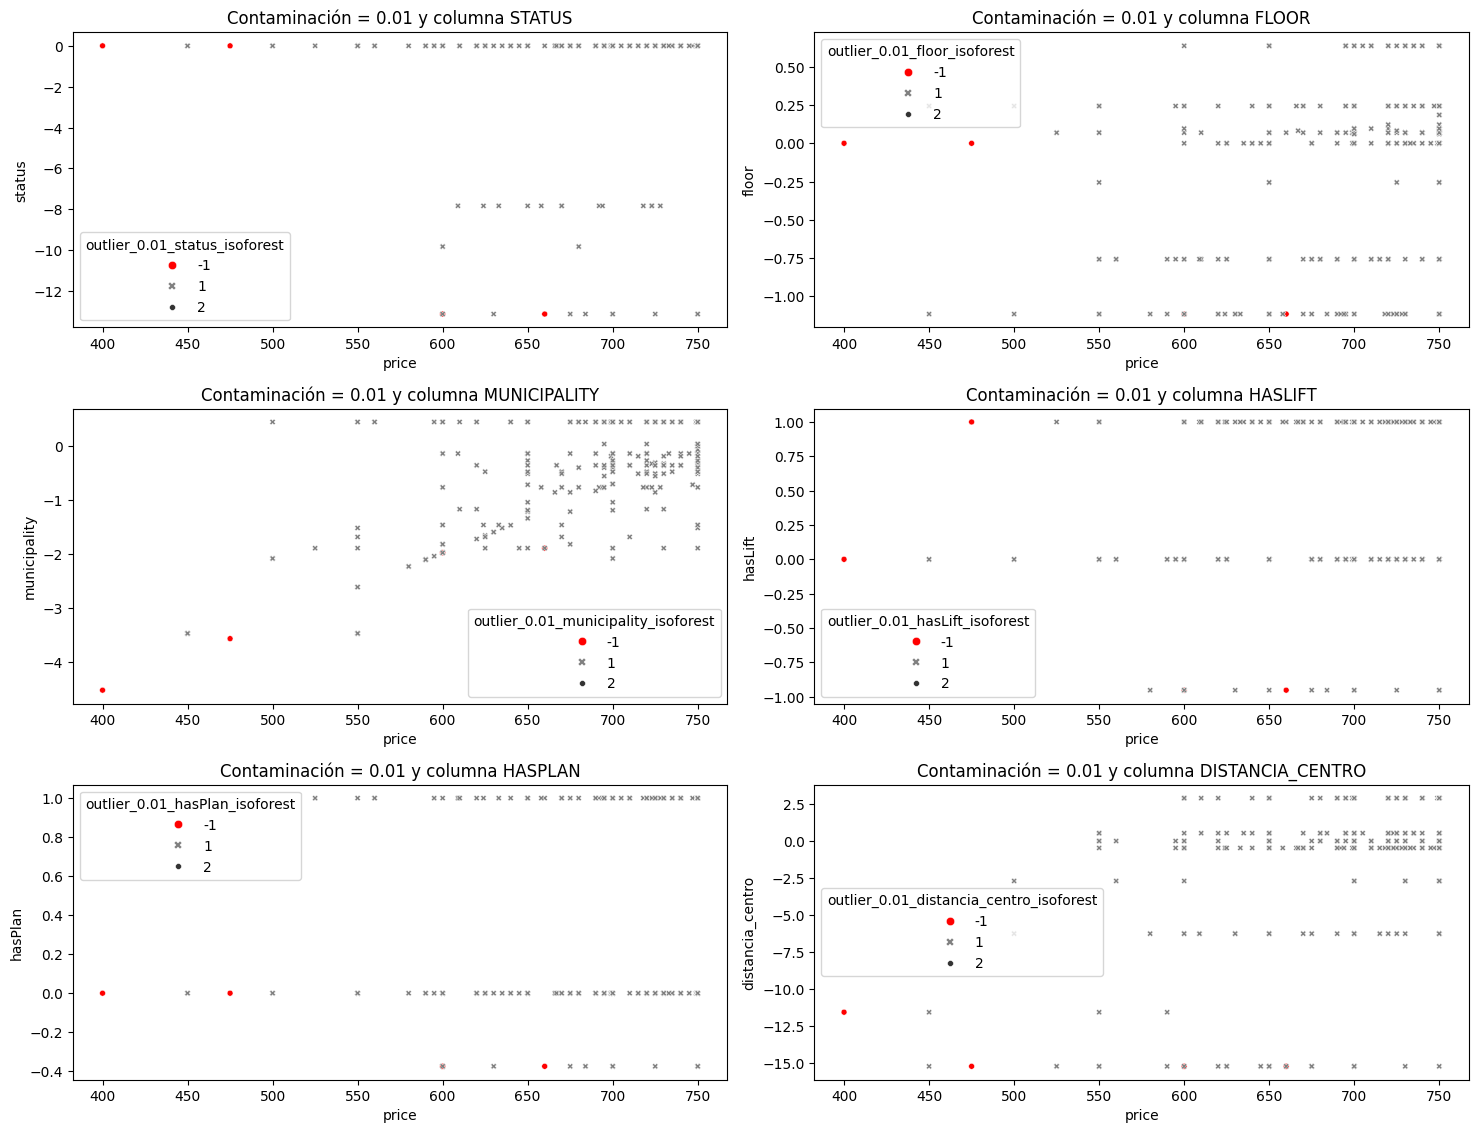

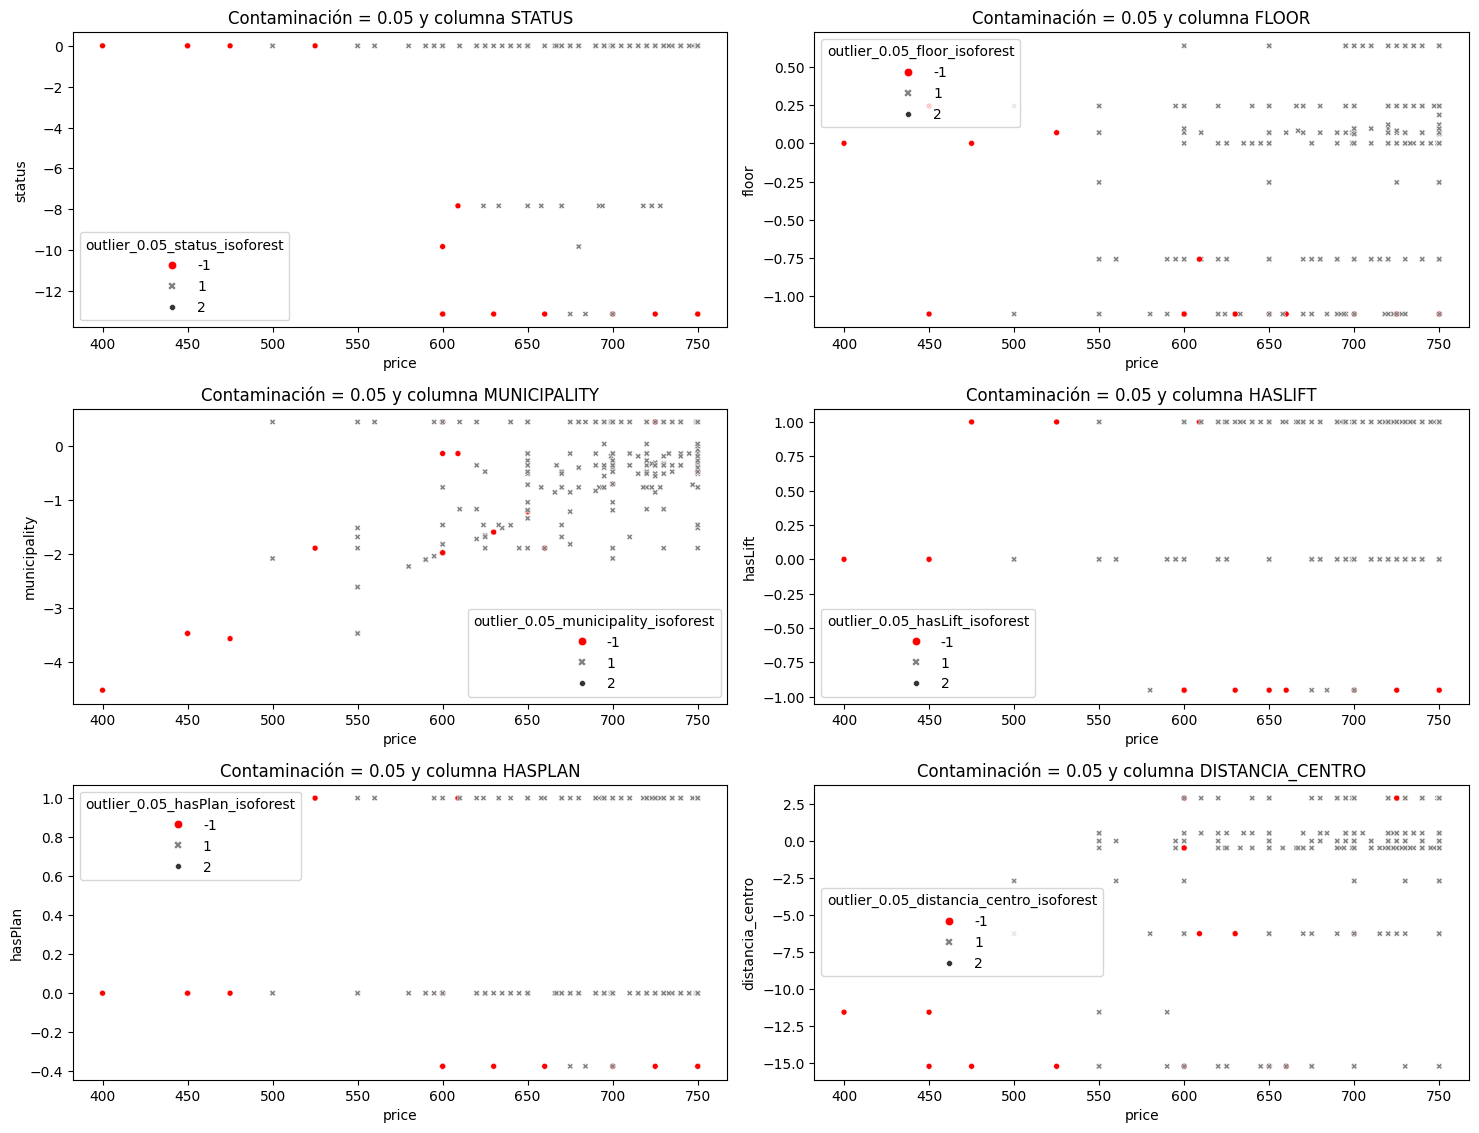

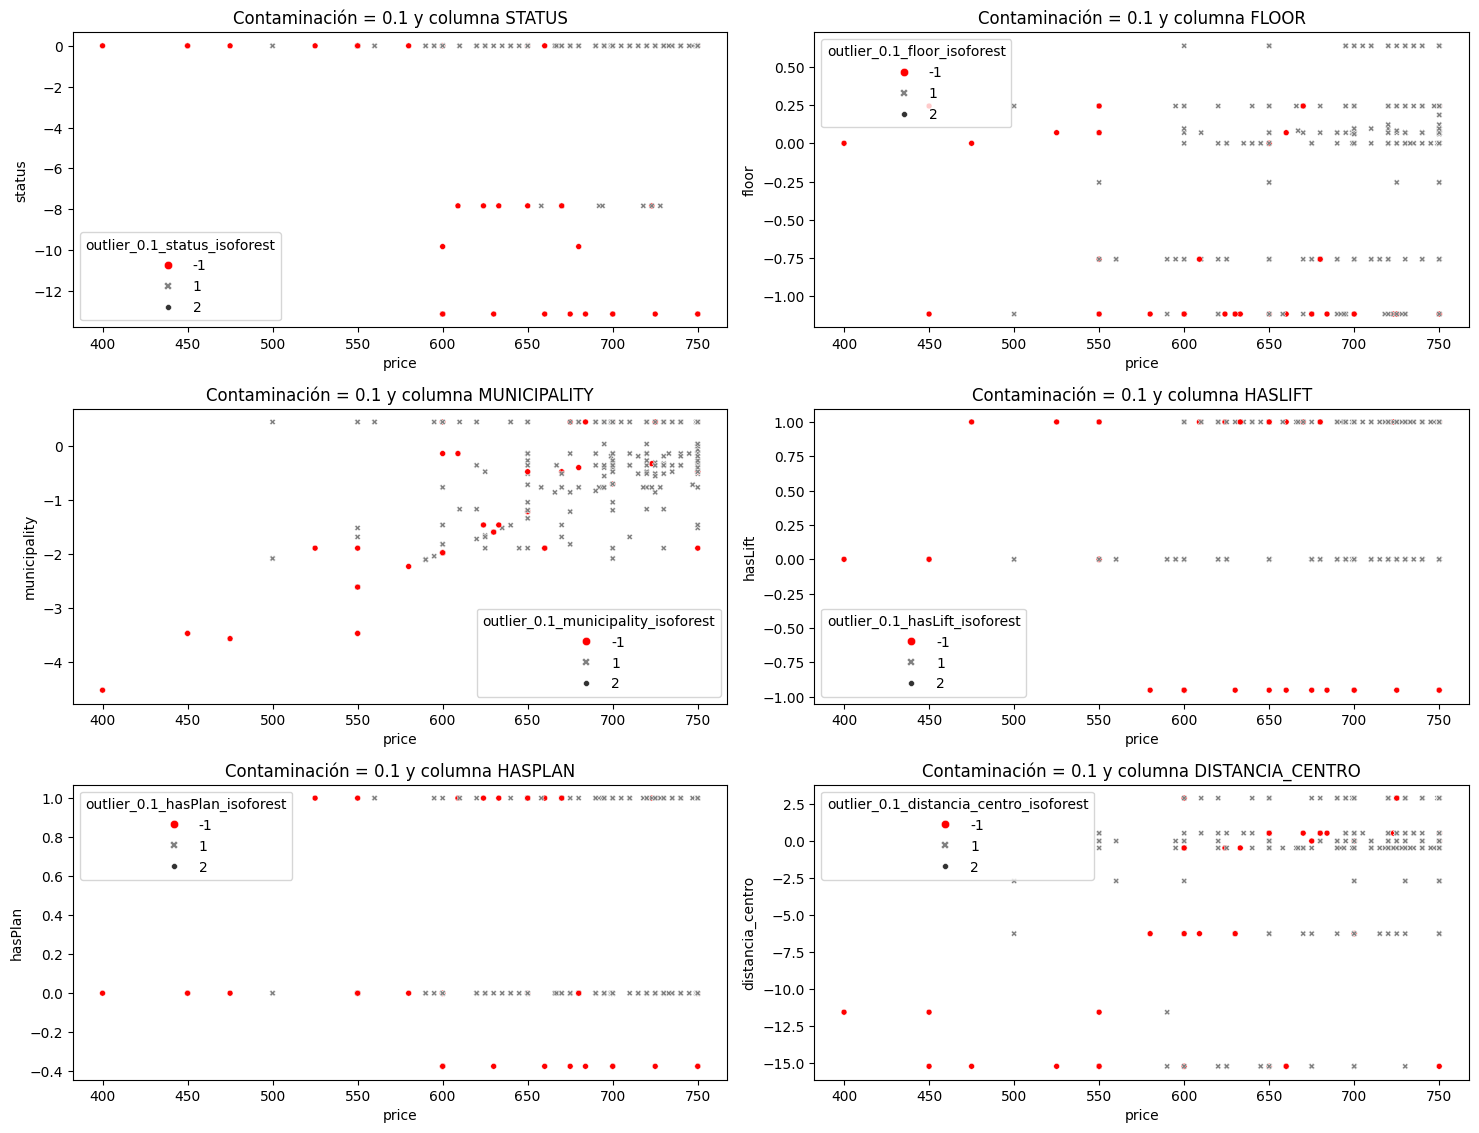

In [50]:
cols_analizar = ["status","floor","municipality","hasLift","hasPlan","distancia_centro","price"]
df_iso = explorar_outliers_if(df[cols_visualizar],df,"price",grafica_size=(15,15))

In [51]:
df_iso.sample()

,status,floor,municipality,hasLift,hasPlan,distancia_centro,price,size,propertyType_chalet,propertyType_countryHouse,...,outlier_0.05_hasPlan_isoforest,outlier_0.05_distancia_centro_isoforest,outlier_0.05_price_isoforest,outlier_0.1_status_isoforest,outlier_0.1_floor_isoforest,outlier_0.1_municipality_isoforest,outlier_0.1_hasLift_isoforest,outlier_0.1_hasPlan_isoforest,outlier_0.1_distancia_centro_isoforest,outlier_0.1_price_isoforest
52,-13.120517,-1.11468,0.445948,-0.952713,-0.374758,0.0,750.0,35.0,0.0,0.0,...,1,1,1,-1,-1,-1,-1,-1,-1,-1


# Categorizamos los outliers de ambas pruebas
- Para comparar resultados
### Vamos a gestionar los outliers, los vamos a clasificar como
- "No es Outlier": Todas las columnas del LOF son 1
- "Improbable Outlier": El 60% de las columnas son 1
- "Es probable que sea Outlier": El 60% de las columnas son -1
- "Outlier Total": El 100% de las columnas son -1

### ¿Qué voy a hacer?
- Voy a contar cuantos 1 tengo en todas las columnas de outliers para poder categorizarla más adelante

#### Saber cuantas columnas de outlier tengo

In [52]:
len(df_lof.filter(like="outlier_").columns)


54

In [53]:
len(df_iso.filter(like="outlier_").columns)

21

- Tenemos 54 en df_lof
- Tenemos 21 en iso 

### LOF

In [54]:
# Generamos nueva columna
df_lof["tipo_outliers"] = 0

# Contamos cuantos -1 hay
for columna in df_lof.filter(like="outlier").columns:
    df_lof["tipo_outliers"] += (df_lof[columna] == -1).astype(int)

# Generamos el diccionario de condiciones y textos para reemplazar
condiciones = [
    df_lof["tipo_outliers"] == 0,
    df_lof["tipo_outliers"].between(1, 32,"both"),
    df_lof["tipo_outliers"].between(33, 53,"both"),
    df_lof["tipo_outliers"] == 54
]

textos = [
    "No es Outlier",
    "Improbable Outlier",
    "Probable Outlier",
    "Total Outlier"
]

# Reemplazamos la cuenta por el texto
df_lof["tipo_outliers"] = np.select(condiciones, textos, default="Unknown")

In [55]:
df_lof.sample()

,status,floor,municipality,hasLift,hasPlan,distancia_centro,price,size,propertyType_chalet,propertyType_countryHouse,...,outlier_0.05_hasLift_80vecinos_lof,outlier_0.05_hasPlan_80vecinos_lof,outlier_0.05_distancia_centro_80vecinos_lof,outlier_0.1_status_80vecinos_lof,outlier_0.1_floor_80vecinos_lof,outlier_0.1_municipality_80vecinos_lof,outlier_0.1_hasLift_80vecinos_lof,outlier_0.1_hasPlan_80vecinos_lof,outlier_0.1_distancia_centro_80vecinos_lof,tipo_outliers
313,0.0,-0.756628,-0.70067,1.0,0.0,-0.4698,700.0,97.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,No es Outlier


### Isolation Forest

In [56]:
# Generamos nueva columna
df_iso["tipo_outliers"] = 0

# Contamos cuantos -1 hay
for columna in df_iso.filter(like="outlier").columns:
    df_iso["tipo_outliers"] += (df_iso[columna] == -1).astype(int)

# Generamos el diccionario de condiciones y textos para reemplazar
condiciones = [
    df_iso["tipo_outliers"] == 0,
    df_iso["tipo_outliers"].between(1, 12,"both"),
    df_iso["tipo_outliers"].between(13, 20,"both"),
    df_iso["tipo_outliers"] == 21
]

textos = [
    "No es Outlier",
    "Improbable Outlier",
    "Probable Outlier",
    "Total Outlier"
]

# Reemplazamos la cuenta por el texto
df_iso["tipo_outliers"] = np.select(condiciones, textos, default="Unknown")

In [57]:
df_iso.sample()

,status,floor,municipality,hasLift,hasPlan,distancia_centro,price,size,propertyType_chalet,propertyType_countryHouse,...,outlier_0.05_distancia_centro_isoforest,outlier_0.05_price_isoforest,outlier_0.1_status_isoforest,outlier_0.1_floor_isoforest,outlier_0.1_municipality_isoforest,outlier_0.1_hasLift_isoforest,outlier_0.1_hasPlan_isoforest,outlier_0.1_distancia_centro_isoforest,outlier_0.1_price_isoforest,tipo_outliers
162,0.0,0.0,0.445948,0.0,1.0,0.0,730.0,40.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,No es Outlier


# Eliminar columnas que ya no necesitamos
- Nos quitamos las columnas de los outliers, ya las hemos categorizado

In [58]:
df_lof.drop(columns=df_lof.filter(like="outlier_").columns,inplace=True)
df_iso.drop(columns=df_iso.filter(like="outlier_").columns,inplace=True)

# Comparamos Métodos
- Veremos que detecciones han hecho cada uno

In [59]:
df_lof["tipo_outliers"].value_counts().reset_index()

,tipo_outliers,count
0,No es Outlier,270
1,Improbable Outlier,80
2,Probable Outlier,3


In [60]:
df_iso["tipo_outliers"].value_counts().reset_index()

,tipo_outliers,count
0,No es Outlier,317
1,Improbable Outlier,18
2,Probable Outlier,14
3,Total Outlier,4


# Utilizaremos el resultado de LOF
- Vamos a volver nulo el valor de todo lo que tenga como mínimo un resultado de que es un outlier

In [61]:
cols_nulificar = ["status","floor","municipality","hasLift","hasPlan","distancia_centro"]
for columna in cols_nulificar:
    df_lof.loc[df_lof["tipo_outliers"] == "Improbable Outlier", columna] = np.nan
    df_lof.loc[df_lof["tipo_outliers"] == "Probable Outlier", columna] = np.nan
    print(f"Se han vuelto nulos: {df_lof[columna].isnull().sum()} valores en {columna}")



Se han vuelto nulos: 83 valores en status
Se han vuelto nulos: 83 valores en floor
Se han vuelto nulos: 83 valores en municipality
Se han vuelto nulos: 83 valores en hasLift
Se han vuelto nulos: 83 valores en hasPlan
Se han vuelto nulos: 83 valores en distancia_centro


# Rellenamos los nulos con Random Forest en Iterative

In [62]:
df = df_lof.copy()

In [63]:
df.isnull().sum()

status                       83
floor                        83
municipality                 83
hasLift                      83
hasPlan                      83
distancia_centro             83
price                         0
size                          0
propertyType_chalet           0
propertyType_countryHouse     0
propertyType_duplex           0
propertyType_flat             0
propertyType_penthouse        0
propertyType_studio           0
rooms_1 habitacion            0
rooms_2 habitaciones          0
rooms_3 habitaciones          0
rooms_4 habitaciones          0
rooms_sin habitaciones        0
bathrooms_1 aseo              0
bathrooms_2 aseos             0
bathrooms_3 aseos             0
exterior_vista exterior       0
exterior_vista interior       0
has360_desconocido            0
has360_no tiene fotos 360     0
has360_tiene fotos 360        0
tipo_outliers                 0
dtype: int64

In [64]:
cols_nulificar = ["status","floor","municipality","hasLift","hasPlan","distancia_centro"]
df_num = df[cols_nulificar]

# Random Forest
iterative_imputer = IterativeImputer(
    estimator=RandomForestRegressor(random_state=42),
    #max_iter=10,  # Número de iteraciones para ajustar los valores
    random_state=42
)

df_num_imputado = iterative_imputer.fit_transform(df_num)
df_num_sin_nulos = pd.DataFrame(df_num_imputado, columns=df_num.columns)
df_rf = df.copy()
df_rf[df_num.columns] = df_num_sin_nulos
df_rf[cols_nulificar].isnull().sum()


status              0
floor               0
municipality        0
hasLift             0
hasPlan             0
distancia_centro    0
dtype: int64

# Eliminamos "tipo_outliers"
- Ya la hemos utilizado como queríamos

In [65]:
df_rf.drop(columns=("tipo_outliers"),inplace=True)

# Guardamos 
- Nos vamos a intentar una regresión Lineal

In [66]:
df_rf.to_csv("../../datos/06_rent_outliers_gestionados.csv",index=False)